In [63]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os 


from tools.misc_tools import get_h5_data
from matplotlib.colors import Normalize, LightSource
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-04-17 17:05:38,864 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_0,15708_ndim_3_N_64-64-32_recent-m=1/


1.5707963267948966
2025-04-17 17:05:38,883 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,5708_ndim_3_N_64-64-32_recent-localised/
1.6964600329384885
2025-04-17 17:05:38,895 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,6965_ndim_3_N_64-64-32_recent-localised/
1.7592918860102844
2025-04-17 17:05:38,906 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,7593_ndim_3_N_64-64-32_recent-localised/
1.8849555921538759
2025-04-17 17:05:38,917 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulation

(0.675, 0.8)

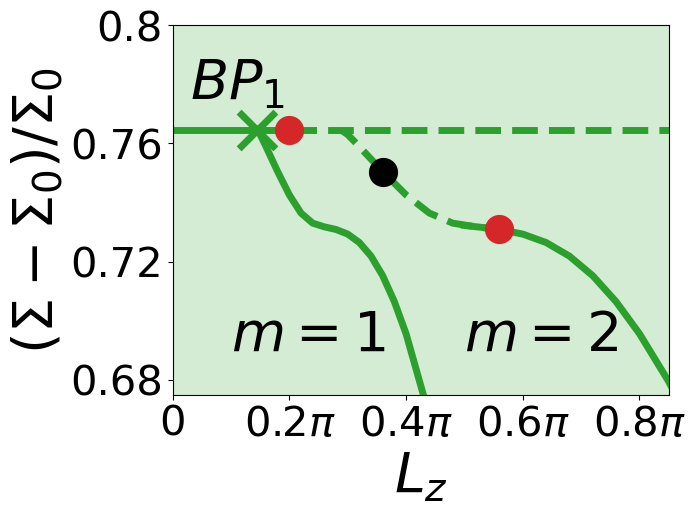

In [64]:
from tools.misc_tools import get_metric_from_params

def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

########################################
##############  W = 14    ##############
########################################

###########################
########## 2D AH ##########
###########################

metric_plot = []
Lz_plot = []

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(0.05*np.pi, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_instab = 0.14*3.1415
plt.hlines(metric_plot[0], 0, Lz_instab, color='tab:green', linewidth=5)
plt.hlines(metric_plot[0], Lz_instab, 100, color='tab:green', linestyles='--', linewidth=5)

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.5, 0.54, 0.56, 0.6, 0.64, 0.68, 0.72, 0.76, 0.8, 0.85, 0.9, 0.95, 1]) * np.pi

for Lz in Lz_list:
    print(Lz)
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

plt.plot(Lz_plot, metric_plot, color='tab:green', linewidth=5)
# plt.scatter(Lz_plot, metric_plot, color='tab:green', s=6, marker='x')

plt.scatter(Lz_plot[-1], metric_plot[-1], s=120, marker='o', color='tab:green')

# plt.scatter(Lz_plot[0], metric_plot[0], s=400, marker='x', linewidths=5, color='tab:green')

############################
######## m=1 branch ########
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.145, 0.15, 0.155, 0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.45, 0.5, 0.6, 0.7,0.8, 0.9, 1]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

plt.plot(Lz_plot, metric_plot, color='tab:green', linewidth=5)
# plt.scatter(Lz_plot, metric_plot, color='tab:green', s=6, marker='x')
plt.scatter(Lz_plot[-1], metric_plot[-1], s=120, marker='o', color='tab:green')

plt.plot(2* np.array(Lz_plot)[:10], metric_plot[:10], color='tab:green', linestyle=(1, (3.7, 1.6)), linewidth=5)
plt.scatter(2*Lz_plot[-1], metric_plot[-1], s=120, marker='o', color='tab:green')
# plt.scatter(2*np.array(Lz_plot), metric_plot, color='tab:green', s=6, marker='x')

plt.scatter(Lz_plot[0], metric_plot[0], s=700, marker='x', linewidths=5, color='tab:green')
# plt.scatter(2*Lz_plot[0], metric_plot[0], s=400, marker='x', linewidths=5, color='tab:green')

###### Scatter points
metric_plot = []
Lz_plot = []

Lz_list = np.array([0.1,0.18,0.28]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_plot = list(np.array(Lz_plot) * 2)

plt.scatter(Lz_plot[::2],metric_plot[::2], s=400, marker='o', color='tab:red', zorder=2)
plt.scatter(Lz_plot[1::2], metric_plot[1::2], s=400, marker='o', color='black', zorder=2)

plt.text(0.03*np.pi, 0.775, r'$BP_1$', fontsize=40)

plt.text(0.1*np.pi, 0.69, r'$m=1$', fontsize=40)
plt.text(0.5*np.pi, 0.69, r'$m=2$', fontsize=40)

#######
ax = plt.gca()
ax.set_facecolor((44/256, 160/256, 44/256, 0.2))

plt.xticks([0, 0.2*np.pi, 0.4*np.pi, 0.6*np.pi, 0.8*np.pi, np.pi], [0, r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$', r'$0.8\pi$', r'$\pi$'], fontsize=30)
plt.yticks([0.68, 0.72,0.76,0.8],[0.68, 0.72,0.76,0.8], fontsize=30)
plt.xlabel(r'$L_z$', fontsize=40)
plt.ylabel(r'$(\Sigma-\Sigma_0)/\Sigma_0$', fontsize=40)

plt.xlim(np.array([0, 0.85])*np.pi)
plt.ylim(np.array([0.675, 0.8]))



2025-04-17 17:05:39,446 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_5,6549_ndim_3_N_64-64-32_recent-localised/
2025-04-17 17:05:39,628 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_6,2832_ndim_3_N_64-64-32_recent-localised/
2025-04-17 17:05:39,793 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_6,9115_ndim_3_N_64-64-48_recent-localised/
2025-04-17 17:05:40,017 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_6,9743_

(0.08, 0.285)

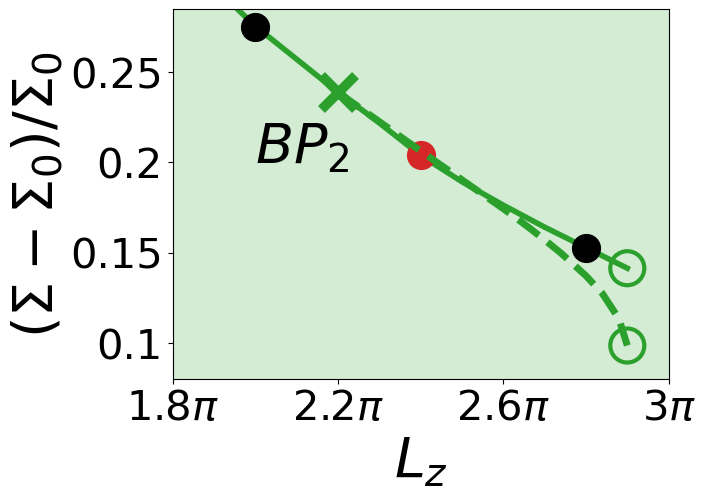

In [65]:
from tools.misc_tools import get_metric_from_params

def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

########################################
##############  W = 14    ##############
########################################

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([1.8, 2]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

Lz_list = np.array([2.2, 2.22, 2.25, 2.27, 2.3, 2.4, 2.5, 2.6,2.7,2.8,2.9]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

plt.plot(Lz_plot, metric_plot, color='tab:green', linewidth=4)
# plt.scatter(Lz_plot, metric_plot, color='tab:green', s=6, marker='x')


plt.scatter(Lz_plot[2], metric_plot[2], s=600, marker='x', linewidths=7, color='tab:green')
plt.scatter(Lz_plot[-1], metric_plot[-1], s=600, marker='o', linewidth=3, facecolors='none', edgecolors='tab:green')

###### Scatter points
metric_plot = []
Lz_plot = []

Lz_list = np.array([2, 2.4, 2.8]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

plt.scatter(Lz_plot[0],metric_plot[0], s=400, marker='o', color='black', zorder=2)
plt.scatter(Lz_plot[1], metric_plot[1], s=400, marker='o', color='tab:red', zorder=2)
plt.scatter(Lz_plot[2],metric_plot[2], s=400, marker='o', color='black', zorder=2)


############################
######## m=1 branch ########
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([1.1, 1.2, 1.3, 1.32, 1.33,1.35, 1.37, 1.4, 1.42, 1.44, 1.45]) * np.pi

for Lz in Lz_list:
    print(Lz)
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

plt.plot(2* np.array(Lz_plot), metric_plot, color='tab:green', linestyle='--', linewidth=5)

plt.scatter(2*Lz_plot[-1], metric_plot[-1], s=600, marker='o', linewidth=3, facecolors='none', edgecolors='tab:green')
# plt.scatter(2*Lz_plot[-1], metric_plot[-1], s=60, marker='o', color='tab:green')
# plt.scatter(2*np.array(Lz_plot), metric_plot, color='tab:green', s=6, marker='x')

plt.text(2*np.pi, 0.20, r'$BP_2$', fontsize=40)

ax = plt.gca()
ax.set_facecolor((44/256, 160/256, 44/256, 0.2))

plt.xticks([1.8*np.pi, 2.2*np.pi, 2.6*np.pi, 3*np.pi, ], [r'$1.8\pi$', r'$2.2\pi$', r'$2.6\pi$', r'$3\pi$'], fontsize=30)
plt.yticks([0.1,0.15,0.2,0.25],[0.1,0.15,0.2,0.25], fontsize=30)
plt.xlabel(r'$L_z$', fontsize=40)
plt.ylabel(r'$(\Sigma-\Sigma_0)/\Sigma_0$', fontsize=40)

plt.xlim(np.array([1.8, 3])*np.pi)
plt.ylim(np.array([0.08, 0.285]))



2025-04-17 17:05:44,605 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_0,15708_ndim_3_N_64-64-32_recent-m=1/
2025-04-17 17:05:44,618 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,5708_ndim_3_N_64-64-32_recent-localised/
2025-04-17 17:05:44,631 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,6965_ndim_3_N_64-64-32_recent-localised/
2025-04-17 17:05:44,650 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,7593_ndim_

Text(11.623892818282235, 20, 'Localised')

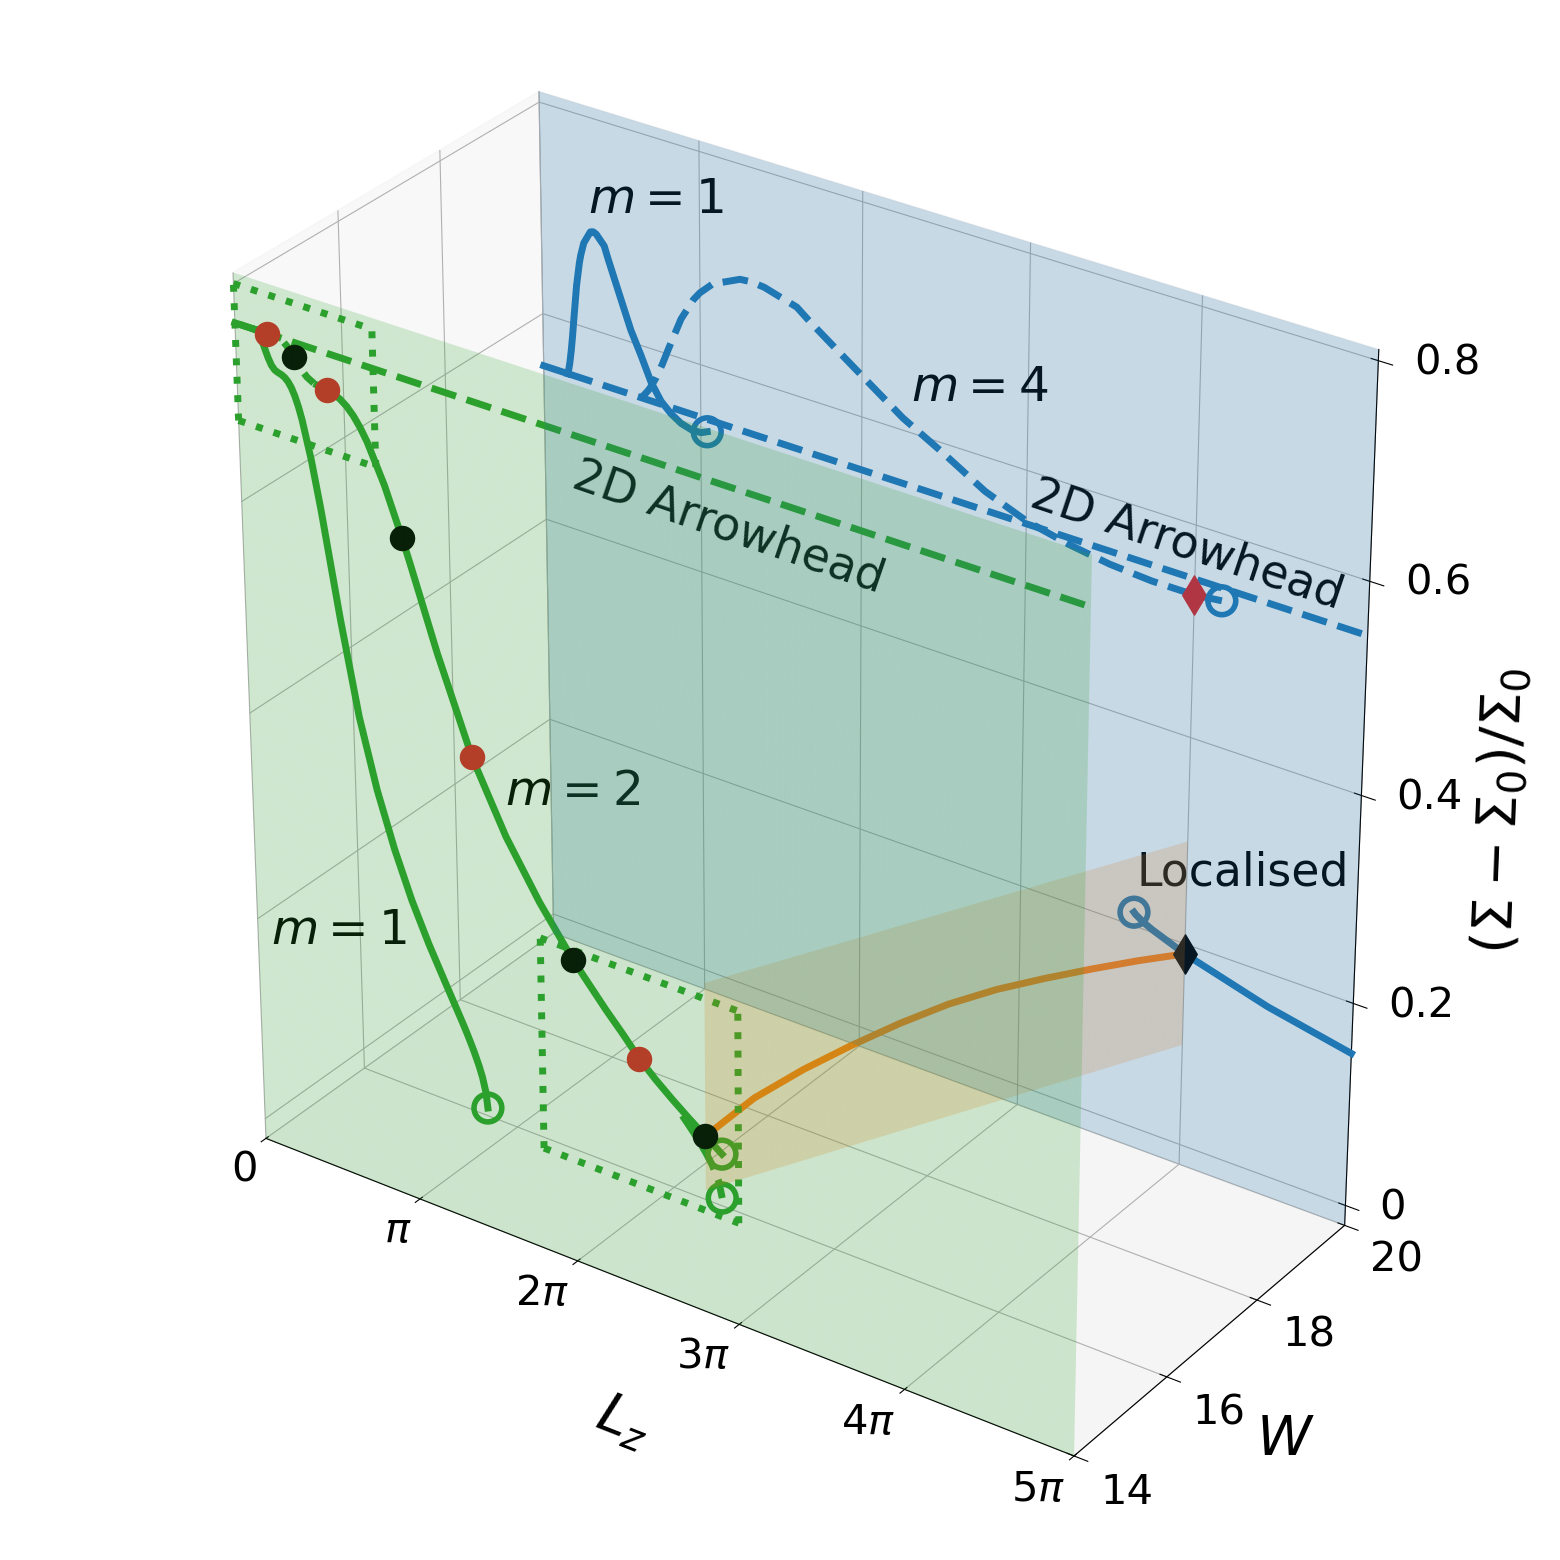

In [66]:
from tools.misc_tools import get_metric_from_params

def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r"$L_z$", labelpad=50, fontsize=40)
ax.set_ylabel(r"$W$", labelpad=30, fontsize=40)
ax.set_zlabel(r'$(\Sigma-\Sigma_0)/\Sigma_0$',labelpad=50, fontsize=40)

ax.view_init(elev=30, azim=-55, roll=0)

ax.set_box_aspect((2, 1, 2), zoom=0.95)
ax.set_xlim(0, 5*np.pi)  
ax.set_ylim(14, 20)  
ax.set_zlim(-0.02, 0.81)  

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20, va='center', ha='right')
ax.set_yticks([14,16,18,20],[14,16,18,20], fontsize=20, va='center', ha='left')
ax.set_zticks([0,0.2,0.4,0.6,0.8], [0,0.2,0.4,0.6,0.8], fontsize=20, va='center', ha='left')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
ax.tick_params(axis='z', pad=10)

plt.tick_params(axis='both', which='major', labelsize=30)
# ax.set_yticklabels(labels, rotation=-15, va='center', ha='left')



#################
## Draw planes ##
#################

W = np.linspace(14, 20, 100)
Lz = np.linspace(0, 5*np.pi, 100)
amp = np.linspace(-0.02, 0.81, 100)

xgrid, ygrid = np.meshgrid(Lz, amp, sparse=False, indexing='ij')

ax.plot_surface(xgrid, np.ones_like(xgrid) * 14, ygrid, rstride=1, cstride=1,
                            color='tab:green', shade=False, zorder=0.25, alpha=0.2)

ax.plot_surface(xgrid, np.ones_like(xgrid) * 20, ygrid, rstride=1, cstride=1,
                            color='tab:blue', shade=False, zorder=0.25, alpha=0.2)

i = np.linspace(0,1,100)
W = 14 + 6 * i
Lz = (2.8 + 1.2 * i) * np.pi
amp = np.linspace(0.1, 0.3, 100)

xgrid, ygrid = np.meshgrid(i, amp, sparse=False, indexing='ij')
Wgrid = 14 + 6 * xgrid
Lzgrid = (2.8 + 1.2 * xgrid) * np.pi
ax.plot_surface(Lzgrid, Wgrid, ygrid, rstride=1, cstride=1,
                            color='tab:orange', shade=False, zorder=0.25, alpha=0.2)


########################################
##############  W = 14    ##############
########################################

###########################
########## 2D AH ##########
###########################

metric_plot = []
Lz_plot = []

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(0.05*np.pi, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_instab = 0.43

Lz_cont1 = np.linspace(0, Lz_instab, 100) 
Lz_cont2 = np.linspace(Lz_instab, 5*np.pi, 100)
ax.plot(Lz_cont1, np.ones_like(Lz_cont1) * metric_plot[0], zs=14, zdir='y', color='tab:green', linestyle='-', zorder=0.01, linewidth=5)
ax.plot(Lz_cont2, np.ones_like(Lz_cont2) * metric_plot[0], zs=14, zdir='y', color='tab:green', linestyle='--', zorder=0.01, linewidth=5)

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.5, 0.54, 0.56, 0.6,0.64, 0.68, 0.72, 0.76, 0.8, 0.9, 1,1.05, 1.1, 1.2, 1.4, 1.6, 1.8, 2]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

Lz_list = np.array([2.2, 2.3, 2.4, 2.5, 2.6,2.7,2.8,2.9]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

ax.plot(Lz_plot, metric_plot, zs=14, zdir='y', color='tab:green', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot,  14*np.ones_like(metric_plot), metric_plot, color='tab:green', s=80, marker='x')
ax.scatter(Lz_plot[-1],  14, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:green')

###############################
### Markers on Drawn States ###
###############################

# plot_state_Lz_Nz_W(base_flow_14, Lz=0.1*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='tab:red')
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.16*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='black')
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.26*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True,color='tab:red')


metric_plot = []
Lz_plot = []

    # metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')


Lz_list = np.array([0.1,0.18,0.28]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_plot = list(np.array(Lz_plot) * 2)

Lz_list = np.array([1, 1.4, 2]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

Lz_list = np.array([2.4, 2.8]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

ax.scatter(Lz_plot[::2],  14, metric_plot[::2], s=300, marker='o', color='tab:red', zorder=2, depthshade=False)
ax.scatter(Lz_plot[1::2],  14, metric_plot[1::2], s=300, marker='o', color='black', zorder=2, depthshade=False)


############################
######## m=1 branch ########
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.05, 0.1,0.12,0.14, 0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.45, 0.5, 0.6, 0.7,0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.32, 1.33,1.35, 1.37, 1.4, 1.42, 1.44, 1.45]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

ax.plot(Lz_plot, metric_plot, zs=14, zdir='y', color='tab:green', linestyle='-', zorder=0.01, linewidth=5)
# ax.scatter(Lz_plot,  14*np.ones_like(metric_plot), metric_plot, color='tab:green', s=80, marker='x')
ax.scatter(Lz_plot[-1],  14, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:green')

Lz_plot = np.array(Lz_plot)
ax.plot(Lz_plot[:9]*2, metric_plot[:9], zs=14, zdir='y', color='tab:green', linestyle='--', zorder=0.01, linewidth=5)
ax.plot(Lz_plot[-7:]*2, metric_plot[-7:], zs=14, zdir='y', color='tab:green', linestyle='--', zorder=0.01, linewidth=5)
# ax.scatter(Lz_plot*2,  14*np.ones_like(metric_plot), metric_plot, color='tab:green', s=80, marker='x')
ax.scatter(Lz_plot[-1]*2,  14, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:green')



########################################
##############  W = 20    ##############
########################################


###########################
########## 2D AH ##########
###########################

metric_plot = []
Lz_plot = []

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(0.125*np.pi, 16, 20, metric_plot, Lz_plot, suffix_end='periodic')


Lz_instab = 0.155*np.pi

Lz_cont1 = np.linspace(0, Lz_instab, 100) 
Lz_cont2 = np.linspace(Lz_instab, 5*np.pi, 100)
ax.plot(Lz_cont1, np.ones_like(Lz_cont1) * metric_plot[0], zs=20, zdir='y', color='tab:blue', linestyle='-', zorder=0.01, linewidth=5)
ax.plot(Lz_cont2, np.ones_like(Lz_cont2) * metric_plot[0], zs=20, zdir='y', color='tab:blue', linestyle='--', zorder=0.01, linewidth=5)

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([3.69, 3.7, 3.75,3.8, 4]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 64, 20, metric_plot, Lz_plot, suffix_end='localised-yz')

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(4.5*np.pi, 72, 20, metric_plot, Lz_plot)
metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(5*np.pi, 80, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(5.5*np.pi, 88, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(6*np.pi, 96, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(6.5*np.pi, 104, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(7*np.pi, 112, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(7.5*np.pi, 120, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(8*np.pi, 128, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(10*np.pi, 160, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(12*np.pi, 192, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(14*np.pi, 224, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(16*np.pi, 256, 20, metric_plot, Lz_plot)

ax.plot(Lz_plot, metric_plot, zs=20, zdir='y', color='tab:blue', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot,  20*np.ones_like(metric_plot), metric_plot, color='tab:blue', s=80, marker='x')

ax.scatter(Lz_plot[0],  20, metric_plot[0], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:blue')

if Lz_plot[4] != 4*np.pi: raise Exception
ax.scatter(Lz_plot[4],  20, metric_plot[4], s=400, marker='d', color='black')


############################
###### m=1 ######
############################

metric_plot = []
Lz_plot = []


Lz_list = np.array([ 0.155*np.pi, 0.16*np.pi, np.pi/6, 0.17*np.pi, 0.18*np.pi, 0.19*np.pi, 0.2*np.pi, 0.22*np.pi, 0.24*np.pi, 0.25*np.pi, 0.27*np.pi, 0.3125*np.pi, 0.33*np.pi, 0.35*np.pi, 0.375*np.pi, 0.4*np.pi, 0.42*np.pi, 0.46*np.pi, np.pi/2,  9*np.pi/16,10*np.pi/16,11*np.pi/16, 12*np.pi/16,13*np.pi/16,14*np.pi/16, 15*np.pi/16])

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 16, 20, metric_plot, Lz_plot, suffix_end='periodic-yz')

Lz_list = np.array([ np.pi, 1.04*np.pi])

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 20, metric_plot, Lz_plot, suffix_end='periodic-yz')

ax.plot(Lz_plot, metric_plot, zs=20, zdir='y', color='tab:blue', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot,  20*np.ones_like(metric_plot), metric_plot, color='tab:blue', s=80, marker='x')
ax.scatter(Lz_plot[-1],  20, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:blue')

Lz_plot = np.array(Lz_plot)

ax.plot(Lz_plot*4, metric_plot, zs=20, zdir='y', color='tab:blue', linestyle='--', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot*4,  20*np.ones_like(metric_plot), metric_plot, color='tab:blue', s=80, marker='x')
ax.scatter(Lz_plot[-1] * 4,  20, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:blue')

if Lz_plot[-2] != np.pi: raise Exception
ax.scatter(4*Lz_plot[-2],  20, metric_plot[-2], s=400, marker='d', color='tab:red')

########################################
#####  W = 14 connected to W=20    #####
########################################


metric_plot = []
Lz_plot = []

for i in [0, 0.1]:
    W = i * 6 + 14
    Lz  = i * 1.2 * np.pi + 2.8*np.pi
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, W, metric_plot, Lz_plot, suffix_end='localised')


for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    W = i * 6 + 14
    Lz  = i * 1.2 * np.pi + 2.8*np.pi
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 64, W, metric_plot, Lz_plot, suffix_end='localised')

W_plot = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) * 6 + 14

ax.plot(Lz_plot, W_plot, metric_plot, color='tab:orange', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot, W_plot, metric_plot, color='tab:orange', s=80, marker='x')

#####################
####### Boxes ########
#####################

Lz_cont = np.linspace(1.8*np.pi, 3*np.pi, 100)
amp_cont = np.linspace(0.08, 0.285, 100)

ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[0], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[-1], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont) * Lz_cont[0], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont)* Lz_cont[-1], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)

Lz_cont = np.linspace(0, 0.85*np.pi, 100)
amp_cont = np.linspace(0.675, 0.8, 100)

ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[0], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[-1], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont) * Lz_cont[0], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont)* Lz_cont[-1], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)


#####################
####### Text ########
#####################

ax.text(0.08*np.pi, 14, 0.18, r'$m=1$', fontsize=35, color='black')
ax.text(1.6*np.pi, 14, 0.4, r'$m=2$', fontsize=35, color='black')
ax.text(2*np.pi, 14, 0.62, r'2D Arrowhead', fontsize=33, color='black', zdir='x')


ax.text(0.3*np.pi, 20, 0.71, r'$m=1$', fontsize=35, color='black')
ax.text(2.3*np.pi, 20, 0.63, r'$m=4$', fontsize=35, color='black')
ax.text(3*np.pi, 20, 0.47, r'2D Arrowhead', fontsize=33, color='black', zdir='x')
ax.text(3.7*np.pi, 20, 0.24, r'Localised', fontsize=33, color='black')


In [79]:

import copy
from tools.kolmogorov import TimeStepper3D
from tools.misc_tools import get_h5_data, get_fpath_sim
from dedalus.tools import post

def plot_state_Lz_Nz_W(base_flow, Lz, Nz, W, suffix_end='localised', tile=False, log_scale=False, **kwargs):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D')
    post.merge_process_files(fpath, cleanup=True)
    data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', s=-1)

    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
    c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
    c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
    trace_dev = c11 + c22 + c33
    activity = get_activity(trace_dev, x, y)

    if tile:
        z, activity = tile_activity(z, activity, Lz, tile_num=tile)
        z = np.concatenate((z, [z[0] + tile*Lz]))

        activity = np.concatenate((activity, [activity[0]]))
    else:
        z = np.concatenate((z, [z[0] + Lz]))
        activity = np.concatenate((activity, [activity[0]]))

    plt.plot(z, activity, **kwargs)

    if log_scale: plt.yscale('log')

def get_activity(field, x, y):
    field_2  = np.array(field) ** 2 
    field_2_x = trapezoid(field_2, x, axis=-3) / (3*np.pi)
    field_2_xy = trapezoid(field_2_x, y, axis=-1) / (2*np.pi)
    field_xy = field_2_xy ** 0.5
    return field_xy

def get_base_flow(W):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64}
    system_params = {'Lx': 3*np.pi, 'ndim': 2, 'n': 1}

    timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params)
    base_flow = timestepper.base_flow_full
    return base_flow

def tile_activity(z, activity, Lz, tile_num=2):
    Nz = z.shape[0]

    if tile_num == 2:
        z_tiled = np.concatenate((z - Lz, z, z + Lz))[Nz//2: -Nz//2]
    elif tile_num == 4:
        z_tiled = np.concatenate((z - 2 * Lz, z - Lz , z, z + Lz, z+2*Lz))[Nz//2: -Nz//2]
    else:
        raise Exception
    
    activity_tiled = np.concatenate([activity]*tile_num)
    
    activity_tiled = np.roll(activity_tiled, shift=Nz//2)
    return z_tiled, activity_tiled

In [85]:
base_flow_14 = get_base_flow(14)
base_flow_16 = get_base_flow(16)
base_flow_20 = get_base_flow(20)
base_flow_15_8 = get_base_flow(15.8)

2025-04-17 17:24:34,234 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.8e+01/s
2025-04-17 17:24:34,575 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.2e+01/s
2025-04-17 17:24:34,670 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.3e+01/s
2025-04-17 17:24:34,674 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-04-17 17:24:34,770 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 6.1e+01/s
2025-04-17 17:24:34,824 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 0s, Rate: 5.8e+01/s
2025-04-17 17:24:34,891 pencil 0/1 INFO :: Building pencil matrix 8/32 (~25%) Elapsed: 0s, Remaining: 0s, Rate: 5.8e+01/s
2025-04-17 17:24:34,957 pencil 0/1 INFO :: Building pencil matrix 12/32 (~38%) Elapsed: 0s, Remaining: 0s, Rate: 5.9e+01/s
2025-04-17 17:24:35,024 pencil 0/1 IN

2025-04-17 17:24:52,644 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_4,3982_ndim_3_N_64-64-32_recent-localised/


2025-04-17 17:24:52,668 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_8,7965_ndim_3_N_64-64-48_recent-localised/
2025-04-17 17:24:52,689 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,566_ndim_3_N_64-64-64_recent-localised/
2025-04-17 17:24:52,729 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_3,1416_ndim_3_N_64-64-32_recent-periodic-yz/
2025-04-17 17:24:52,749 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_15,8_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_9,9

([<matplotlib.axis.YTick at 0x7f499f6df5c0>,
 [Text(0, 60, '60'),
  Text(0, 100, '100'),
  Text(0, 200, '200'),
  Text(0, 400, '400'),
  Text(0, 800, '800')])

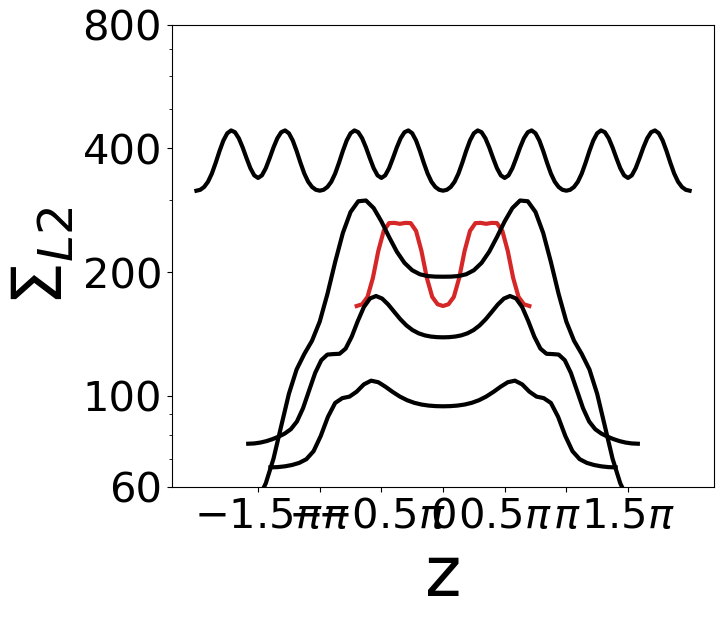

In [ ]:
plt.figure(figsize=(7,6))
width = 3
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.1*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.18*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='black', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.28*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True,color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=np.pi, Nz=32, W=14, suffix_end='localised', color='black', linewidth=width)
plot_state_Lz_Nz_W(base_flow_14, Lz=1.4*np.pi, Nz=32, W=14, suffix_end='localised',color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=2*np.pi, Nz=32, W=14, suffix_end='localised', color='black', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=2.4*np.pi, Nz=48, W=14, suffix_end='localised',color='tab:red', linewidth=width)
plot_state_Lz_Nz_W(base_flow_14, Lz=2.8*np.pi, Nz=48, W=14, suffix_end='localised', color='black', linewidth=width)

plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end='localised', color='black', linewidth=width)

plot_state_Lz_Nz_W(base_flow_20, Lz=1*np.pi, Nz=32, W=20, suffix_end='periodic-yz', tile=4, color='black', linewidth=width)

plot_state_Lz_Nz_W(base_flow_15_8, Lz=3.16*np.pi, Nz=64, W=15.8, suffix_end='localised', color='black', linewidth=width)


# suffix_end = f'recent-a-{np.pi/2:.4g}-b-{np.pi/4:.4g}-Lz-orig-3,14'


plt.yscale('log')
# plt.ylim(60, 800)
plt.xlabel('z', fontsize=50)
plt.ylabel(r'$ \Sigma_{L2}$', fontsize=50)
# plt.tick_params(axis='both', which='major', labelsize=40)
plt.xticks([0, np.pi, 0.5*np.pi, 1.5*np.pi, -np.pi, -0.5*np.pi, -1.5*np.pi], ['0', r'$\pi$', r'$0.5\pi$', r'$1.5\pi$', r'$-\pi$', r'$-0.5\pi$', r'$-1.5\pi$'], fontsize=30)
plt.yticks([60, 100,200, 400, 800],[60, 100,200, 400, 800] , fontsize=30)
plt.xlim(0, 2*np.pi)


2025-04-17 15:08:09,808 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_50,265_ndim_3_N_64-64-256_recent-localised/


2025-04-17 15:08:14,561 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_37,699_ndim_3_N_64-64-192_recent-localised/
2025-04-17 15:08:14,636 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_25,133_ndim_3_N_64-64-128_recent-localised/
2025-04-17 15:08:14,696 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,566_ndim_3_N_64-64-64_recent-localised/


(0.0, 25.446900494077322)

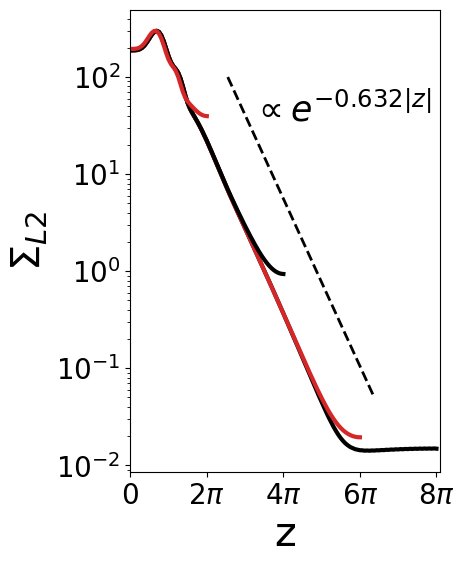

In [89]:
plt.figure(figsize=(4,6))
plot_state_Lz_Nz_W(base_flow_20, Lz=16*np.pi, Nz=256, W=20, suffix_end='localised', log_scale=True, color='black', linewidth=3)
plot_state_Lz_Nz_W(base_flow_20, Lz=12*np.pi, Nz=192, W=20, suffix_end='localised', log_scale=True, color='tab:red', linewidth=3)
plot_state_Lz_Nz_W(base_flow_20, Lz=8*np.pi, Nz=128, W=20, suffix_end='localised', log_scale=True, color='black', linewidth=3)
plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end='localised', log_scale=True, color='tab:red', linewidth=3)
# plot_state_Lz_Nz_W(base_flow_20, Lz=6*np.pi, Nz=96, W=20, suffix_end='localised', log_scale=True)
# plot_state_Lz_Nz_W(base_flow_20, Lz=10*np.pi, Nz=160, W=20, suffix_end='localised', log_scale=True)
# plot_state_Lz_Nz_W(base_flow_20, Lz=14*np.pi, Nz=224, W=20, suffix_end='localised', log_scale=True)

gradient = -0.632
z_line = np.linspace(8, 20, 100)
activity_line = np.exp(gradient * (z_line - 8)) * 100
plt.plot(z_line, activity_line, color='black', linestyle='--', zorder=0.01, linewidth=2)
plt.text(10,30, r"$\propto e^{-0.632 |z|}$", fontsize=25, color='black', rotation=0, ha='left', va='bottom')
plt.yscale('log')
# plt.ylim(60, 1000)
plt.xlabel('z', fontsize=30)
plt.ylabel(r'$ \Sigma_{L2}$', fontsize=30)
plt.xticks([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi, -2*np.pi, -4*np.pi, -6*np.pi, -8*np.pi,], ['0', r'$2\pi$', r'$4\pi$', r'$6\pi$', r'$8\pi$', r'$-2\pi$', r'$-4\pi$', r'$-6\pi$', r'$-8\pi$'], fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0, 8.1*np.pi)


# Windowing and Localised Plot

In [53]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

from tools.misc_tools import get_h5_data
from matplotlib.colors import Normalize, LightSource
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from dedalus.tools import post


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:

from tools.misc_tools import get_fpath_sim
from tools.plotter import plot_from_array
from tools.kolmogorov import TimeStepper3D
import copy 

material_params = {'W': 20, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
system_params = {'Lx': 3*np.pi,  'Lz': np.pi, 'ndim': 3, 'n':1}
solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 32}

system_params_temp = copy.deepcopy(system_params)
system_params_temp['ndim'] = 2
timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params_temp)
base_flow = timestepper.base_flow_full

data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix='recent-periodic-yz', subdir='arrowhead_3D', s=-1)

x, y, z = data_fields['x'], data_fields['y'], data_fields['z']

fields = ['p', 'c11', 'c12', 'c22', 'u', 'v']

p = data_fields['p'][-1,:,:,:] - base_flow['p'][[0], None, :]
c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
c12 = data_fields['c12'][-1,:,:,:] - base_flow['c12'][[0], None, :]
c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
u = data_fields['u'][-1,:,:,:] - base_flow['u'][[0], None, :]
trace = c11 + c22 + c33

Lx = system_params['Lx']
Nx = solver_params['Nx']
Ny = solver_params['Ny']
Nz = solver_params['Nz']

from cfd_tools.cartesian_systems.misc_tools import shift_reflect

mean_c22_y = np.mean(c22, axis=(0,1))

Ny = mean_c22_y.shape[0]
if mean_c22_y[0] > mean_c22_y[Ny//2]:
    u = shift_reflect(u, parity='odd')
    # v = shift_reflect(v, parity='even')
    p = shift_reflect(p, parity='even')
    trace = shift_reflect(trace, parity='even')
    c22 = shift_reflect(c22, parity='even')


2025-04-17 16:59:37,356 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.2e+01/s
2025-04-17 16:59:37,700 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.6e+01/s
2025-04-17 16:59:37,794 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.1e+01/s
2025-04-17 16:59:37,798 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-04-17 16:59:37,899 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 5.8e+01/s
2025-04-17 16:59:37,950 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 0s, Rate: 5.9e+01/s
2025-04-17 16:59:38,017 pencil 0/1 INFO :: Building pencil matrix 8/32 (~25%) Elapsed: 0s, Remaining: 0s, Rate: 5.9e+01/s
2025-04-17 16:59:38,085 pencil 0/1 INFO :: Building pencil matrix 12/32 (~38%) Elapsed: 0s, Remaining: 0s, Rate: 5.9e+01/s
2025-04-17 16:59:38,152 pencil 0/1 IN

In [55]:
def draw_surface(array1, x, y, z, ax=None, level_mult=0.7, color='tab:blue', zorder=1, level_val=None):

    if level_val is None:
        level_val = (np.max(array1) - np.min(array1)) * level_mult + np.min(array1)

    try:
        verts, faces, _, _ = marching_cubes(array1, level=level_val, step_size=1, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))
        
        verts[:, 0] += x[0]
        verts[:, 1] += y[0]
        verts[:, 2] += z[0]

        # Fancy indexing: `verts[faces]` to generate a collection of triangles
        ls = LightSource(azdeg=0.0, altdeg=-65.0)
        mesh = Poly3DCollection(verts[faces], shade=True, lightsource=ls, facecolors=color, zorder=zorder)

        ax.add_collection3d(mesh)
    except:
        pass

    return verts, level_val

In [56]:

def plot_3D_surface(array1, x, y, z, ax=None, level_mult=0.7, level_val=None, zorder=1):
    if not np.all(np.isclose(np.diff(x, n=2), 0)) or not np.all(np.isclose(np.diff(y, n=2), 0)) or not np.all(np.isclose(np.diff(z, n=2), 0)):
        raise Exception("Grids not equally spaced. Marching Cube Algorithm will be weird...")
    x, y, z = x, z, y

    if ax is None:
        fig = plt.figure(figsize=(20, 20))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel("x", labelpad=50, fontsize=50)
        ax.set_ylabel("z", labelpad=80, fontsize=50)
        ax.set_zlabel("y",labelpad=50, fontsize=50)

        ax.view_init(elev=30, azim=25, roll=0)

    if isinstance(level_mult, float) or level_mult is None: 
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult, 'tab:blue', zorder, level_val)
    elif isinstance(level_mult, list):
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult[0], 'tab:red', zorder)
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult[1], 'tab:red', zorder)

    plt.tight_layout()

    return ax, verts, level_val

In [57]:
def get_activity(field, x, y):
    field_2  = np.array(field) ** 2 
    field_2_x = trapezoid(field_2, x, axis=0) / (3*np.pi)
    field_2_xy = trapezoid(field_2_x, y, axis=-1) / (2*np.pi)
    field_xy = field_2_xy ** 0.5
    return field_xy

In [58]:
# Tile the periodic solution...
roll_x = -26
roll_z = 0

trace_trans = np.roll(trace, shift=roll_x, axis=0)
trace_trans = np.roll(trace_trans, shift=roll_z, axis=1)
trace_tiled = np.tile(trace_trans, (1, 5, 1))
trace_tiled = trace_tiled[:, Nz//2:-Nz//2, :]

p_trans = np.roll(p, shift=roll_x, axis=0)
p_trans = np.roll(p_trans, shift=roll_z, axis=1)
p_tiled = np.tile(p_trans, (1, 5, 1))
p_tiled = p_tiled[:, Nz//2:-Nz//2, :]

u_trans = np.roll(u, shift=roll_x, axis=0)
u_trans = np.roll(u_trans, shift=roll_z, axis=1)
u_tiled = np.tile(u_trans, (1, 5, 1))
u_tiled = u_tiled[:, Nz//2:-Nz//2, :]


x_tiled = x
y_tiled = y
z_tiled = np.concatenate([z-2*np.pi, z-1*np.pi, z , z+1*np.pi, z+2*np.pi])[Nz//2:-Nz//2]

Nz_tiled = Nz * 4




/tmp/ipykernel_678696/3050897653.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


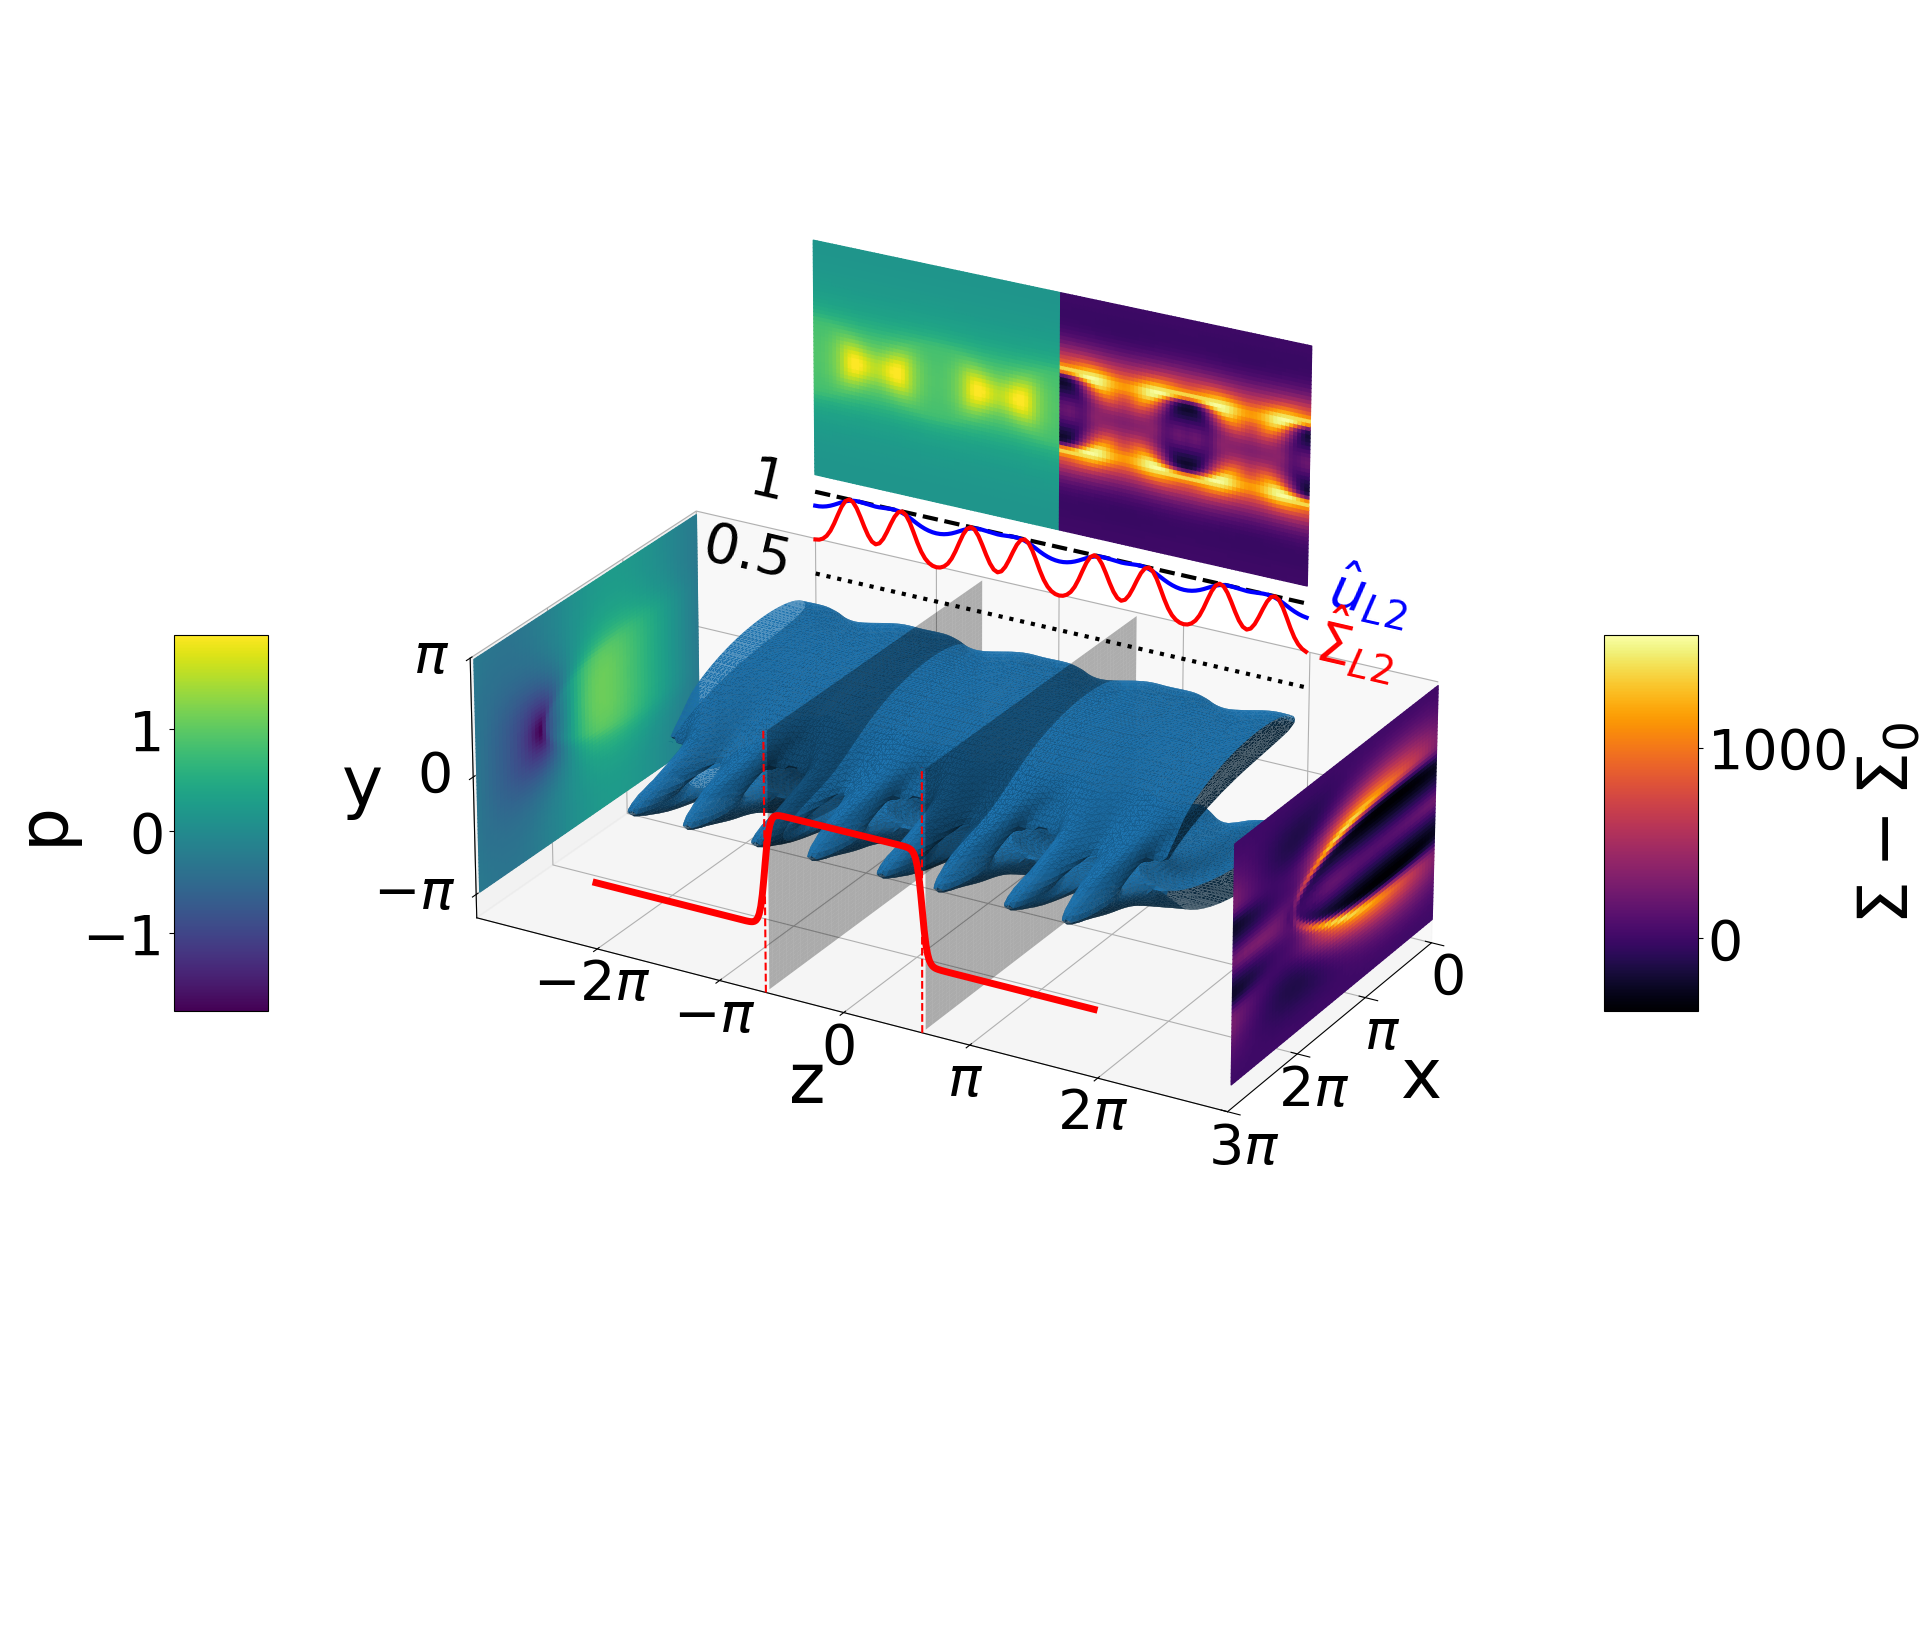

In [59]:
a, b = np.pi/2, np.pi/4
plt.rcParams['font.size'] = 40

z_idx_ab = np.argmin(np.abs(z_tiled-a-0.5*b))
z_idx__ab = np.argmin(np.abs(z_tiled+a+0.5*b))

ax, verts, level_val = plot_3D_surface(trace_tiled[:,:z_idx__ab+1,:], x_tiled, y_tiled, z_tiled[:z_idx__ab+1], ax=None, zorder=0.2, level_val=450)
ax, verts, level_val = plot_3D_surface(trace_tiled[:,z_idx__ab:z_idx_ab+1,:], x_tiled, y_tiled, z_tiled[z_idx__ab:z_idx_ab+1], ax=ax, zorder=0.5, level_val=450)
ax, verts, level_val = plot_3D_surface(trace_tiled[:,z_idx_ab:,:], x_tiled, y_tiled, z_tiled[z_idx_ab:], ax=ax, zorder=0.6, level_val=450)
ax.computed_zorder = False

ax.view_init(elev=25, azim=30, roll=0)

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40)
ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
ax.set_yticks([0, 1*np.pi, 2*np.pi, -1*np.pi, -2*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$-\pi$', r'$-2\pi$'], fontsize=40)

ax.tick_params(axis='x', pad=5)
ax.tick_params(axis='y', pad=5)
ax.tick_params(axis='z', pad=5)

ax.computed_zorder = False

ax.set_xlim(0, 3*np.pi)  
ax.set_ylim(-3*np.pi, 3*np.pi)  

ax.set_zlim((-1.2*np.pi, np.pi))

ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

#### Plot windowing function

z_plot = np.linspace(np.min(z_tiled), np.max(z_tiled), 300)
window = 1/4 * (1 + np.tanh(6 * (a - z_plot) / b + 3)) * (1 + np.tanh(6 * (a + z_plot) / b + 3))

color = 'red'
ax.plot(z_plot, (window*3-2), zs=Lx, zdir='x', color=color, zorder=10, linewidth=5)

ax.plot([-a-0.5*b, -a-0.5*b], [-1.2*np.pi, np.pi], zs=Lx, zdir='x', color=color, linestyle='--', zorder=10)
ax.plot([a+0.5*b, a+0.5*b], [-1.2*np.pi, np.pi], zs=Lx, zdir='x', color=color, linestyle='--', zorder=10)

#### Plot windowing planes
xgrid, ygrid = np.meshgrid(x_tiled, y_tiled, sparse=False, indexing='ij')
ygrid = 1.1*ygrid - 0.3

ax.plot_surface(xgrid, (a+0.5*b) * np.ones_like(xgrid), ygrid, rstride=1, cstride=1,
                            color='k', shade=False, zorder=0.55, alpha=0.3)

ax.plot_surface(xgrid, -(a+0.5*b) * np.ones_like(xgrid), ygrid, rstride=1, cstride=1,
                            color='k', shade=False, zorder=0.25, alpha=0.3)

#### Plot periodicity
u_metric = get_activity(u_tiled, x_tiled, y_tiled)
u_metric = u_metric / np.max(u_metric)

y_0 = 0
y_1 = np.pi * 1.4
ax.plot(z_tiled, u_metric*(y_1-y_0) + y_0 , zs=0, zdir='x', color='blue', zorder=0.05, linewidth=3)
trace_metric = get_activity(trace_tiled, x_tiled, y_tiled)
trace_metric = trace_metric / np.max(trace_metric)
ax.plot(z_tiled, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.05, linewidth=3)
# ax.plot(z_tiled, y_0 * np.ones_like(z_tiled), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z_tiled, y_1 * np.ones_like(z_tiled), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z_tiled, (y_0 + y_1)/2 * np.ones_like(z_tiled), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)


### Get key p, trace terms
min_p, max_p = np.min(p), np.max(p) * 0.9
min_tr, max_tr = np.min(trace), np.max(trace)

cmap_kind_p = 'viridis'
cmap_p = plt.get_cmap(cmap_kind_p)
cmap_kind_tr = 'inferno'
cmap_tr = plt.get_cmap(cmap_kind_tr)

norm_p = Normalize(vmin=min_p, vmax=max_p)
sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

### Get x-z plane

# xgrid, zgrid = np.meshgrid(x_tiled, z_tiled, sparse=False, indexing='ij')

# p_plane = p_tiled[:,:,Ny//2]
# tr_plane = trace_tiled[:,:,Ny//2]

# p_plane, xgrid_p, zgrid_p = p_plane[:,:Nz_tiled//2+1], xgrid[:, :Nz_tiled//2+1], zgrid[:,:Nz_tiled//2+1]
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, zgrid_tr = tr_plane[:,Nz_tiled//2:], xgrid[:, Nz_tiled//2:], zgrid[:, Nz_tiled//2:]
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)

### Get x-y plane

xgrid, ygrid = np.meshgrid(x_tiled, y_tiled, sparse=False, indexing='ij')

p_plane = p_tiled[:,Nz_tiled//2,:]
tr_plane = trace_tiled[:,Nz_tiled//2,:]

p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, 3*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=5)


## Get y-z plane

zgrid, ygrid = np.meshgrid(z_tiled, y_tiled, sparse=False, indexing='ij')

p_plane = p_tiled[Nx//2,:,:]
tr_plane = trace_tiled[Nx//2,:,:]

p_plane, zgrid_p, ygrid_p = p_plane[:Nz_tiled//2+1,:], zgrid[:Nz_tiled//2+1,:], ygrid[:Nz_tiled//2+1,:]
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

tr_plane, zgrid_tr, ygrid_tr = tr_plane[Nz_tiled//2:,:], zgrid[Nz_tiled//2:,:], ygrid[Nz_tiled//2:,:]
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.01)
ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr+8, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.01)


ax.text(0,2.1*np.pi, 4, r'$\hat u_{L2}$', 'y', color='blue', fontsize=40)
ax.text(0,2.0*np.pi, 2.5, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=40)
ax.text(0,-3*np.pi, 0.43 *np.pi, r'$0.5$','y',  color='black', fontsize=40)
ax.text(0,-2.6*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)

sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08)
cbar.set_label(label='p', size=50)
cbar.ax.tick_params(labelsize=40)

sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='right', pad=-0.08)
cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
cbar.ax.tick_params(labelsize=40)


plt.tight_layout()

In [60]:
material_params = {'W': 20, 'beta': 0.9, 'Re': 0.5, 'L':np.infty, 'eps': 1e-3}
system_params = {'Lx': 3*np.pi,  'Lz': 4*np.pi, 'ndim': 3, 'n':1}
solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 64}

Nz, Nx = solver_params['Nz'], solver_params['Nx']
system_params_temp = copy.deepcopy(system_params)
system_params_temp['ndim'] = 2
timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params_temp)
base_flow = timestepper.base_flow_full

suffix_end = f'recent-a-{np.pi/2:.4g}-b-{np.pi/4:.4g}-Lz-orig-3,14'


fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=suffix_end, subdir='arrowhead_3D')
post.merge_process_files(fpath, cleanup=True)

data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=suffix_end, subdir='arrowhead_3D', s=-1)

x, y, z = data_fields['x'], data_fields['y'], data_fields['z']


2025-04-17 16:59:53,388 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.1e+01/s
2025-04-17 16:59:53,729 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.3e+01/s
2025-04-17 16:59:53,820 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.3e+01/s
2025-04-17 16:59:53,824 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-04-17 16:59:53,920 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 6.1e+01/s
2025-04-17 16:59:53,973 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 0s, Rate: 5.7e+01/s
2025-04-17 16:59:54,041 pencil 0/1 INFO :: Building pencil matrix 8/32 (~25%) Elapsed: 0s, Remaining: 0s, Rate: 5.8e+01/s
2025-04-17 16:59:54,107 pencil 0/1 INFO :: Building pencil matrix 12/32 (~38%) Elapsed: 0s, Remaining: 0s, Rate: 5.9e+01/s
2025-04-17 16:59:54,178 pencil 0/1 IN

In [61]:
p = data_fields['p'][-1,:,:,:]
c22 = data_fields['c22'][-1,:,:,:]
c11 = data_fields['c11'][-1,:,:,:]
u = data_fields['u'][-1,:,:,:]
c33 = data_fields['c33'][-1,:,:,:]
tr = c11 + c22 + c33

Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
U = base_flow['u']

mean_c22_y = np.mean(c22, axis=(0,1))

Ny = mean_c22_y.shape[0]
if mean_c22_y[0] > mean_c22_y[Ny//2]:
    u = shift_reflect(u, parity='odd')
    # v = shift_reflect(v, parity='even')
    p = shift_reflect(p, parity='even')
    c22 = shift_reflect(c22, parity='even')
    c33 = shift_reflect(c33, parity='even')
    c11 = shift_reflect(c11, parity='even')

roll_x = 4
u = np.roll(u, axis=0, shift=roll_x)
p = np.roll(p, axis=0, shift=roll_x)
c22 = np.roll(c22, axis=0, shift=roll_x)
c33 = np.roll(c33, axis=0, shift=roll_x)
c11 = np.roll(c11, axis=0, shift=roll_x)

u_full = data_fields['u'][-1,:,:,:]

p = p - base_flow['p'][:, None, :]
u = u - base_flow['u'][:, None, :]
c22 = c22  - base_flow['c22'][:, None, :]
c11 = c11  - base_flow['c11'][:, None, :]
c33 = c33  - base_flow['c33'][:, None, :]
trace = c11 + c22 + c33



Text(0, -9.42477796076938, '$0.5$')

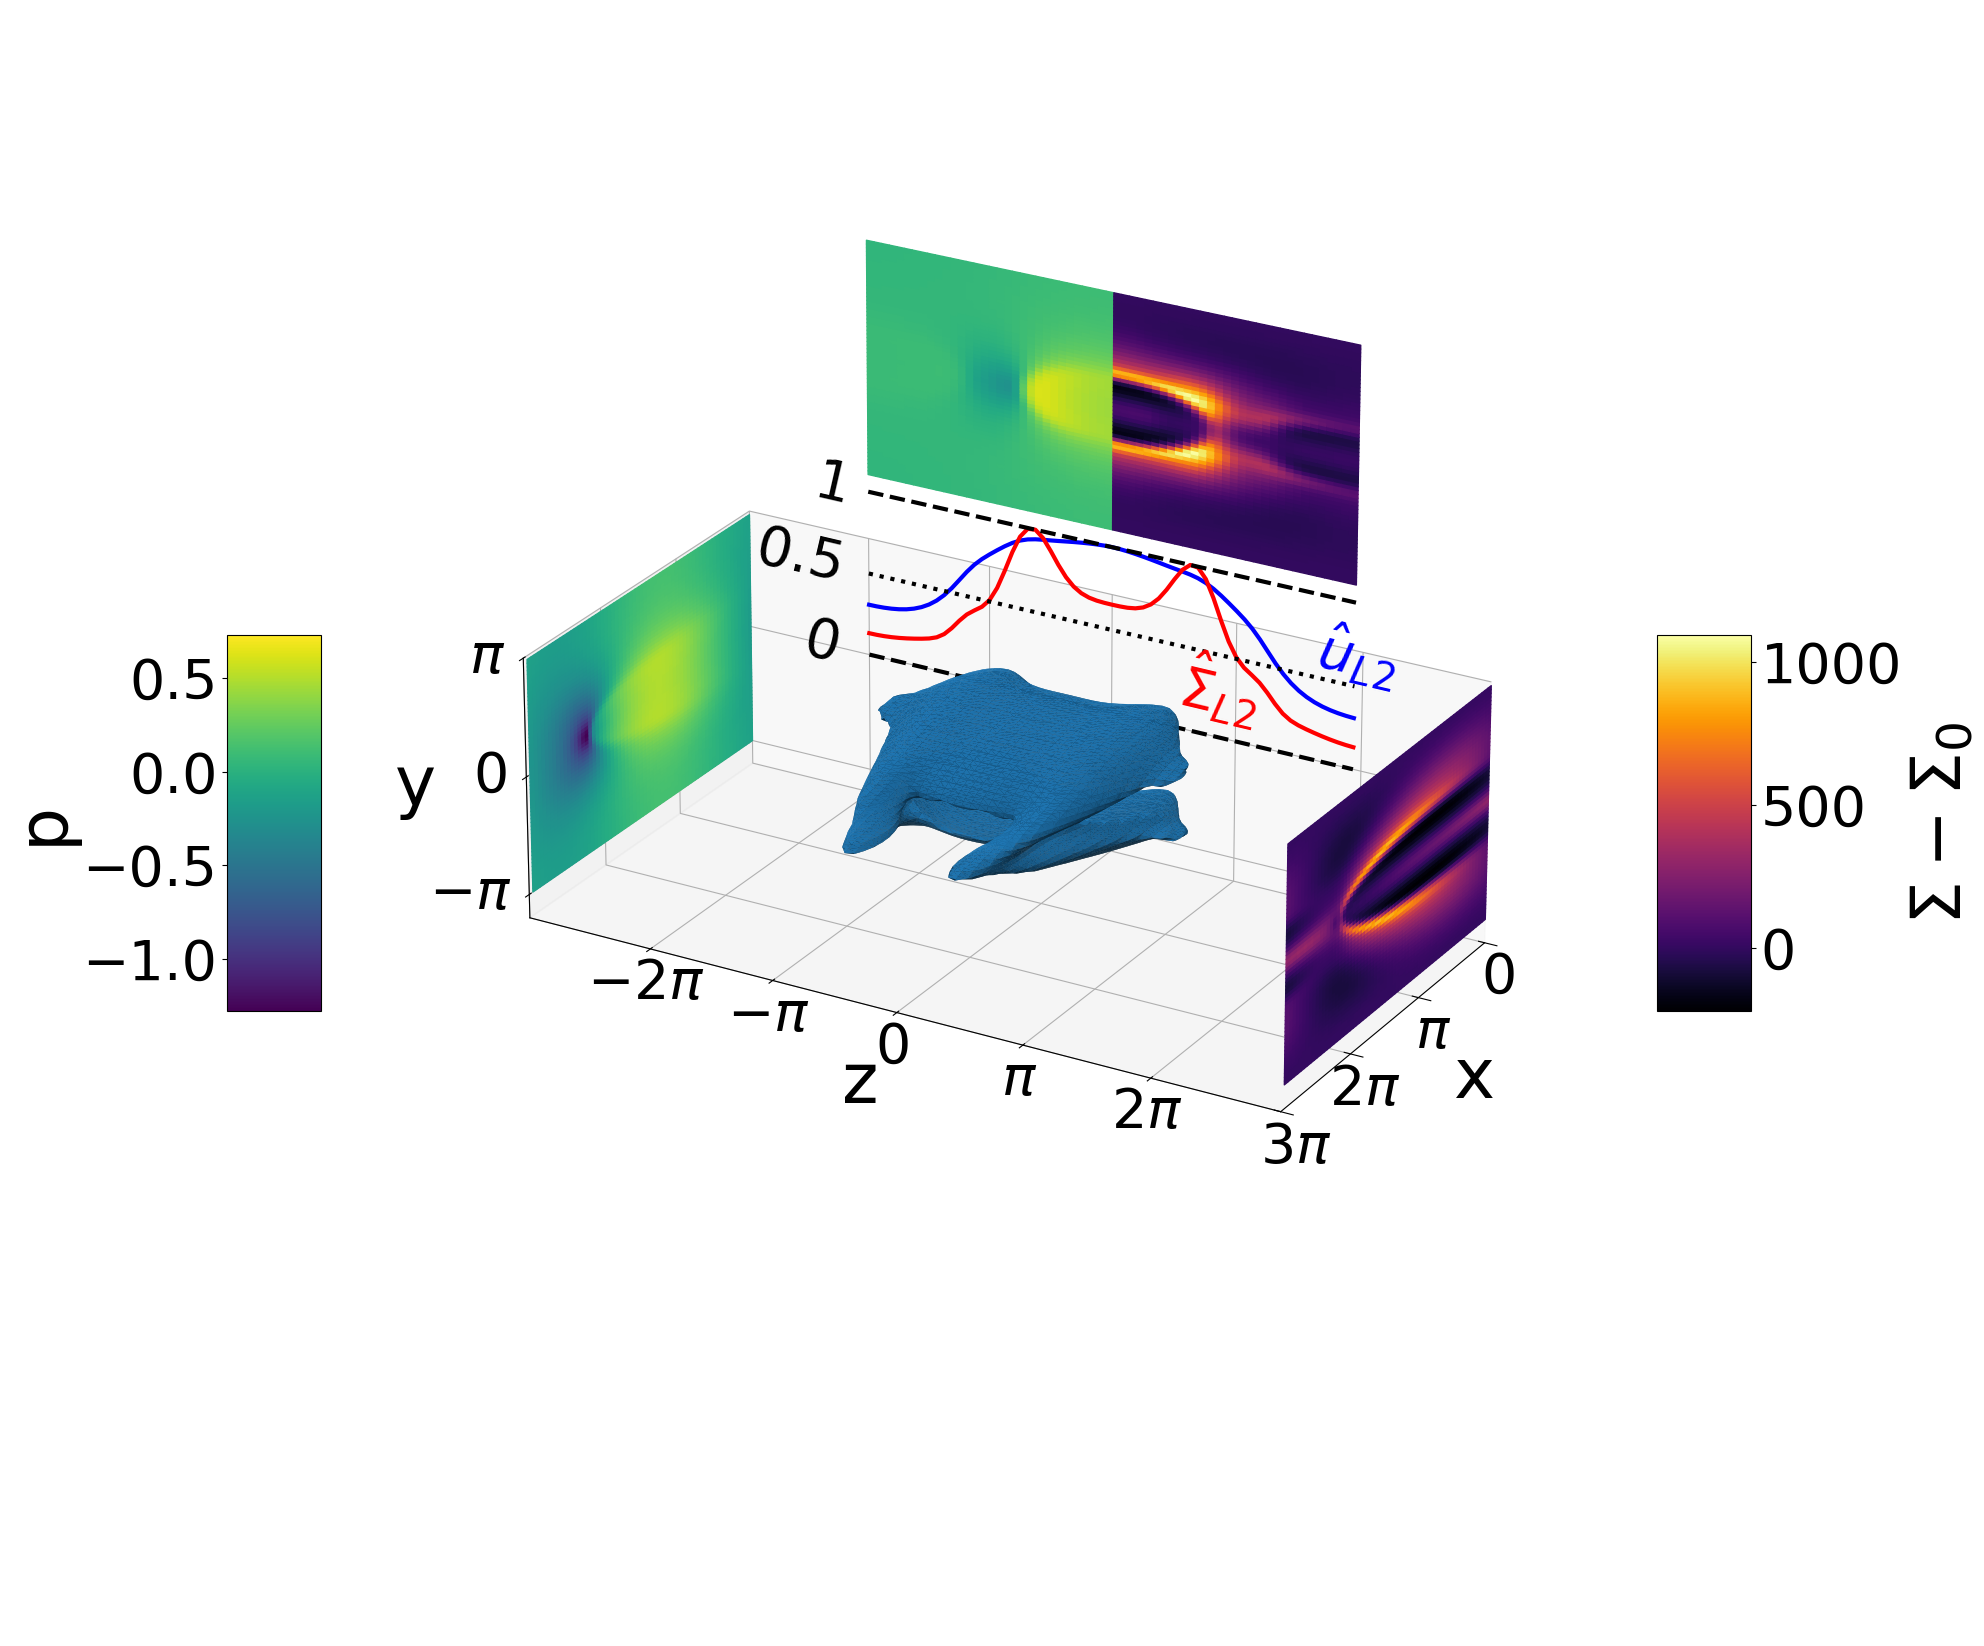

In [62]:
plt.rcParams['font.size'] = 40

ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=450)
# ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

ax.view_init(elev=25, azim=30, roll=0)

ax.computed_zorder = False

ax.set_xlim(0, 3*np.pi)  
ax.set_ylim(-3*np.pi, 3*np.pi)  

ax.set_zlim((-1.2*np.pi, np.pi))


ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40)
ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
ax.set_yticks([0, 1*np.pi, 2*np.pi, -1*np.pi, -2*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$-\pi$', r'$-2\pi$'], fontsize=40)
    
### Get key p, trace terms
min_p, max_p = np.min(p), np.max(p) * 0.6
min_tr, max_tr = np.min(trace), np.max(trace)

cmap_kind_p = 'viridis'
cmap_p = plt.get_cmap(cmap_kind_p)
cmap_kind_tr = 'inferno'
cmap_tr = plt.get_cmap(cmap_kind_tr)

norm_p = Normalize(vmin=min_p, vmax=max_p)
sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

### Get x-z plane

# xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

# p_plane = p[:,:,Ny//2]
# tr_plane = trace[:,:,Ny//2]

# p_plane, xgrid_p, zgrid_p = p_plane[:,:Nz//2+1], xgrid[:, :Nz//2+1], zgrid[:,:Nz//2+1]
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, zgrid_tr = tr_plane[:,Nz//2:], xgrid[:, Nz//2:], zgrid[:,Nz//2:]
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)

### Get x-y plane

xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

p_plane = p[:,Nz//2,:]
tr_plane = trace[:,Nz//2,:]

p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, 3*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.1)


### Get y-z plane

zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

p_plane = p[Nx//2,:,:]
tr_plane = trace[Nx//2,:,:]

p_plane, zgrid_p, ygrid_p = p_plane[:Nz//2+1,:], zgrid[:Nz//2+1,:], ygrid[:Nz//2+1,:]
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

tr_plane, zgrid_tr, ygrid_tr = tr_plane[Nz//2:,:], zgrid[Nz//2:,:], ygrid[Nz//2:,:]
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.01)
ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr +8, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.01)


sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
cbar.set_label(label='p', size=50)
cbar.ax.tick_params(labelsize=40)

sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='right', pad=-0.08)
cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
cbar.ax.tick_params(labelsize=40)

### Showing max trace, u over z
color = 'red'


y_0 = 0
y_1 = np.pi * 1.4

u_metric = get_activity(u, x, y)
u_metric = u_metric / np.max(u_metric)
ax.plot(z, u_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
trace_metric = get_activity(trace, x, y)
trace_metric = trace_metric / np.max(trace_metric)
ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z, (y_0+y_1)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

ax.text(0,1.6*np.pi, 2, r'$\hat u_{L2}$', 'y', color='blue', fontsize=40)
ax.text(0,0.5*np.pi, 0.1, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=40)
ax.text(0,-2.6*np.pi, -0.2*np.pi, r'$0$','y',  color='black', fontsize=40)
ax.text(0,-2.5*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)
ax.text(0,-3*np.pi, 0.4*np.pi, r'$0.5$', 'y', color='black', fontsize=40)


# Drifting Arrowheads

In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

from tools.misc_tools import get_h5_data
from matplotlib.colors import Normalize, LightSource
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from dedalus.tools import post
from cfd_tools.cartesian_systems.misc_tools import shift_reflect



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:

from tools.misc_tools import get_fpath_sim
from tools.plotter import plot_from_array
from tools.kolmogorov import TimeStepper3D
import copy 

material_params = {'W': 20, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
system_params = {'Lx': 3*np.pi,  'Lz': 4*np.pi, 'ndim': 3, 'n':1}
solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 64}

system_params_temp = copy.deepcopy(system_params)
system_params_temp['ndim'] = 2
timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params_temp)
base_flow = timestepper.base_flow_full


fpath = get_fpath_sim(material_params, system_params, solver_params, suffix='recent-test-drift-pert-0,1', subdir='arrowhead_3D')
post.merge_process_files(fpath, cleanup=True)

data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix='recent-test-drift-pert-0,1', subdir='arrowhead_3D', s=-1)


2025-04-17 16:36:38,191 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.0e+01/s
2025-04-17 16:36:38,530 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.3e+01/s
2025-04-17 16:36:38,619 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 5.3e+01/s
2025-04-17 16:36:38,624 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-04-17 16:36:38,722 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 6.0e+01/s
2025-04-17 16:36:38,777 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 1s, Rate: 5.6e+01/s
2025-04-17 16:36:38,843 pencil 0/1 INFO :: Building pencil matrix 8/32 (~25%) Elapsed: 0s, Remaining: 0s, Rate: 5.8e+01/s
2025-04-17 16:36:38,911 pencil 0/1 INFO :: Building pencil matrix 12/32 (~38%) Elapsed: 0s, Remaining: 0s, Rate: 5.8e+01/s
2025-04-17 16:36:38,978 pencil 0/1 IN

In [ ]:
# x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
# Nx, Ny, Nz = solver_params['Nx'], solver_params['Ny'], solver_params['Nz']
# Lz = system_params['Lz']

# p = data_fields['p'][-1,:,:,:]
# c22 = data_fields['c22'][-1,:,:,:]
# c11 = data_fields['c11'][-1,:,:,:]
# u = data_fields['u'][-1,:,:,:]
# w = data_fields['w'][-1,:,:,:]
# c33 = data_fields['c33'][-1,:,:,:]
# tr = c11 + c22 + c33

# Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
# U = base_flow['u']

# mean_c22_y = np.mean(c22, axis=(0,1))

# Ny = mean_c22_y.shape[0]
# if mean_c22_y[0] > mean_c22_y[Ny//2]:
#     u = shift_reflect(u, parity='odd')
#     # v = shift_reflect(v, parity='even')
#     w = shift_reflect(w, parity='even')
#     p = shift_reflect(p, parity='even')
#     c22 = shift_reflect(c22, parity='even')
#     c33 = shift_reflect(c33, parity='even')
#     c11 = shift_reflect(c11, parity='even')

# roll_x = -20
# u = np.roll(u, axis=0, shift=roll_x)
# w = np.roll(w, axis=0, shift=roll_x)
# p = np.roll(p, axis=0, shift=roll_x)
# c22 = np.roll(c22, axis=0, shift=roll_x)
# c33 = np.roll(c33, axis=0, shift=roll_x)
# c11 = np.roll(c11, axis=0, shift=roll_x)


# roll_z = 2
# u = np.roll(u, axis=1, shift=roll_z)
# w = np.roll(w, axis=1, shift=roll_z)
# p = np.roll(p, axis=1, shift=roll_z)
# c22 = np.roll(c22, axis=1, shift=roll_z)
# c33 = np.roll(c33, axis=1, shift=roll_z)
# c11 = np.roll(c11, axis=1, shift=roll_z)

# p = p - base_flow['p'][:, None, :]
# u = u - base_flow['u'][:, None, :]
# w = w - base_flow['w'][:, None, :]
# c22 = c22  - base_flow['c22'][:, None, :]
# c11 = c11  - base_flow['c11'][:, None, :]
# c33 = c33  - base_flow['c33'][:, None, :]
# trace = c11 + c22 + c33

# trace = np.concatenate((trace,trace), axis=1)
# p = np.concatenate((p,p), axis=1)
# u = np.concatenate((u,u), axis=1)

# z = np.concatenate((z - Lz/2, z + Lz/2 ))
# Nz *= 2



Text(0, -0.2, '$1$')

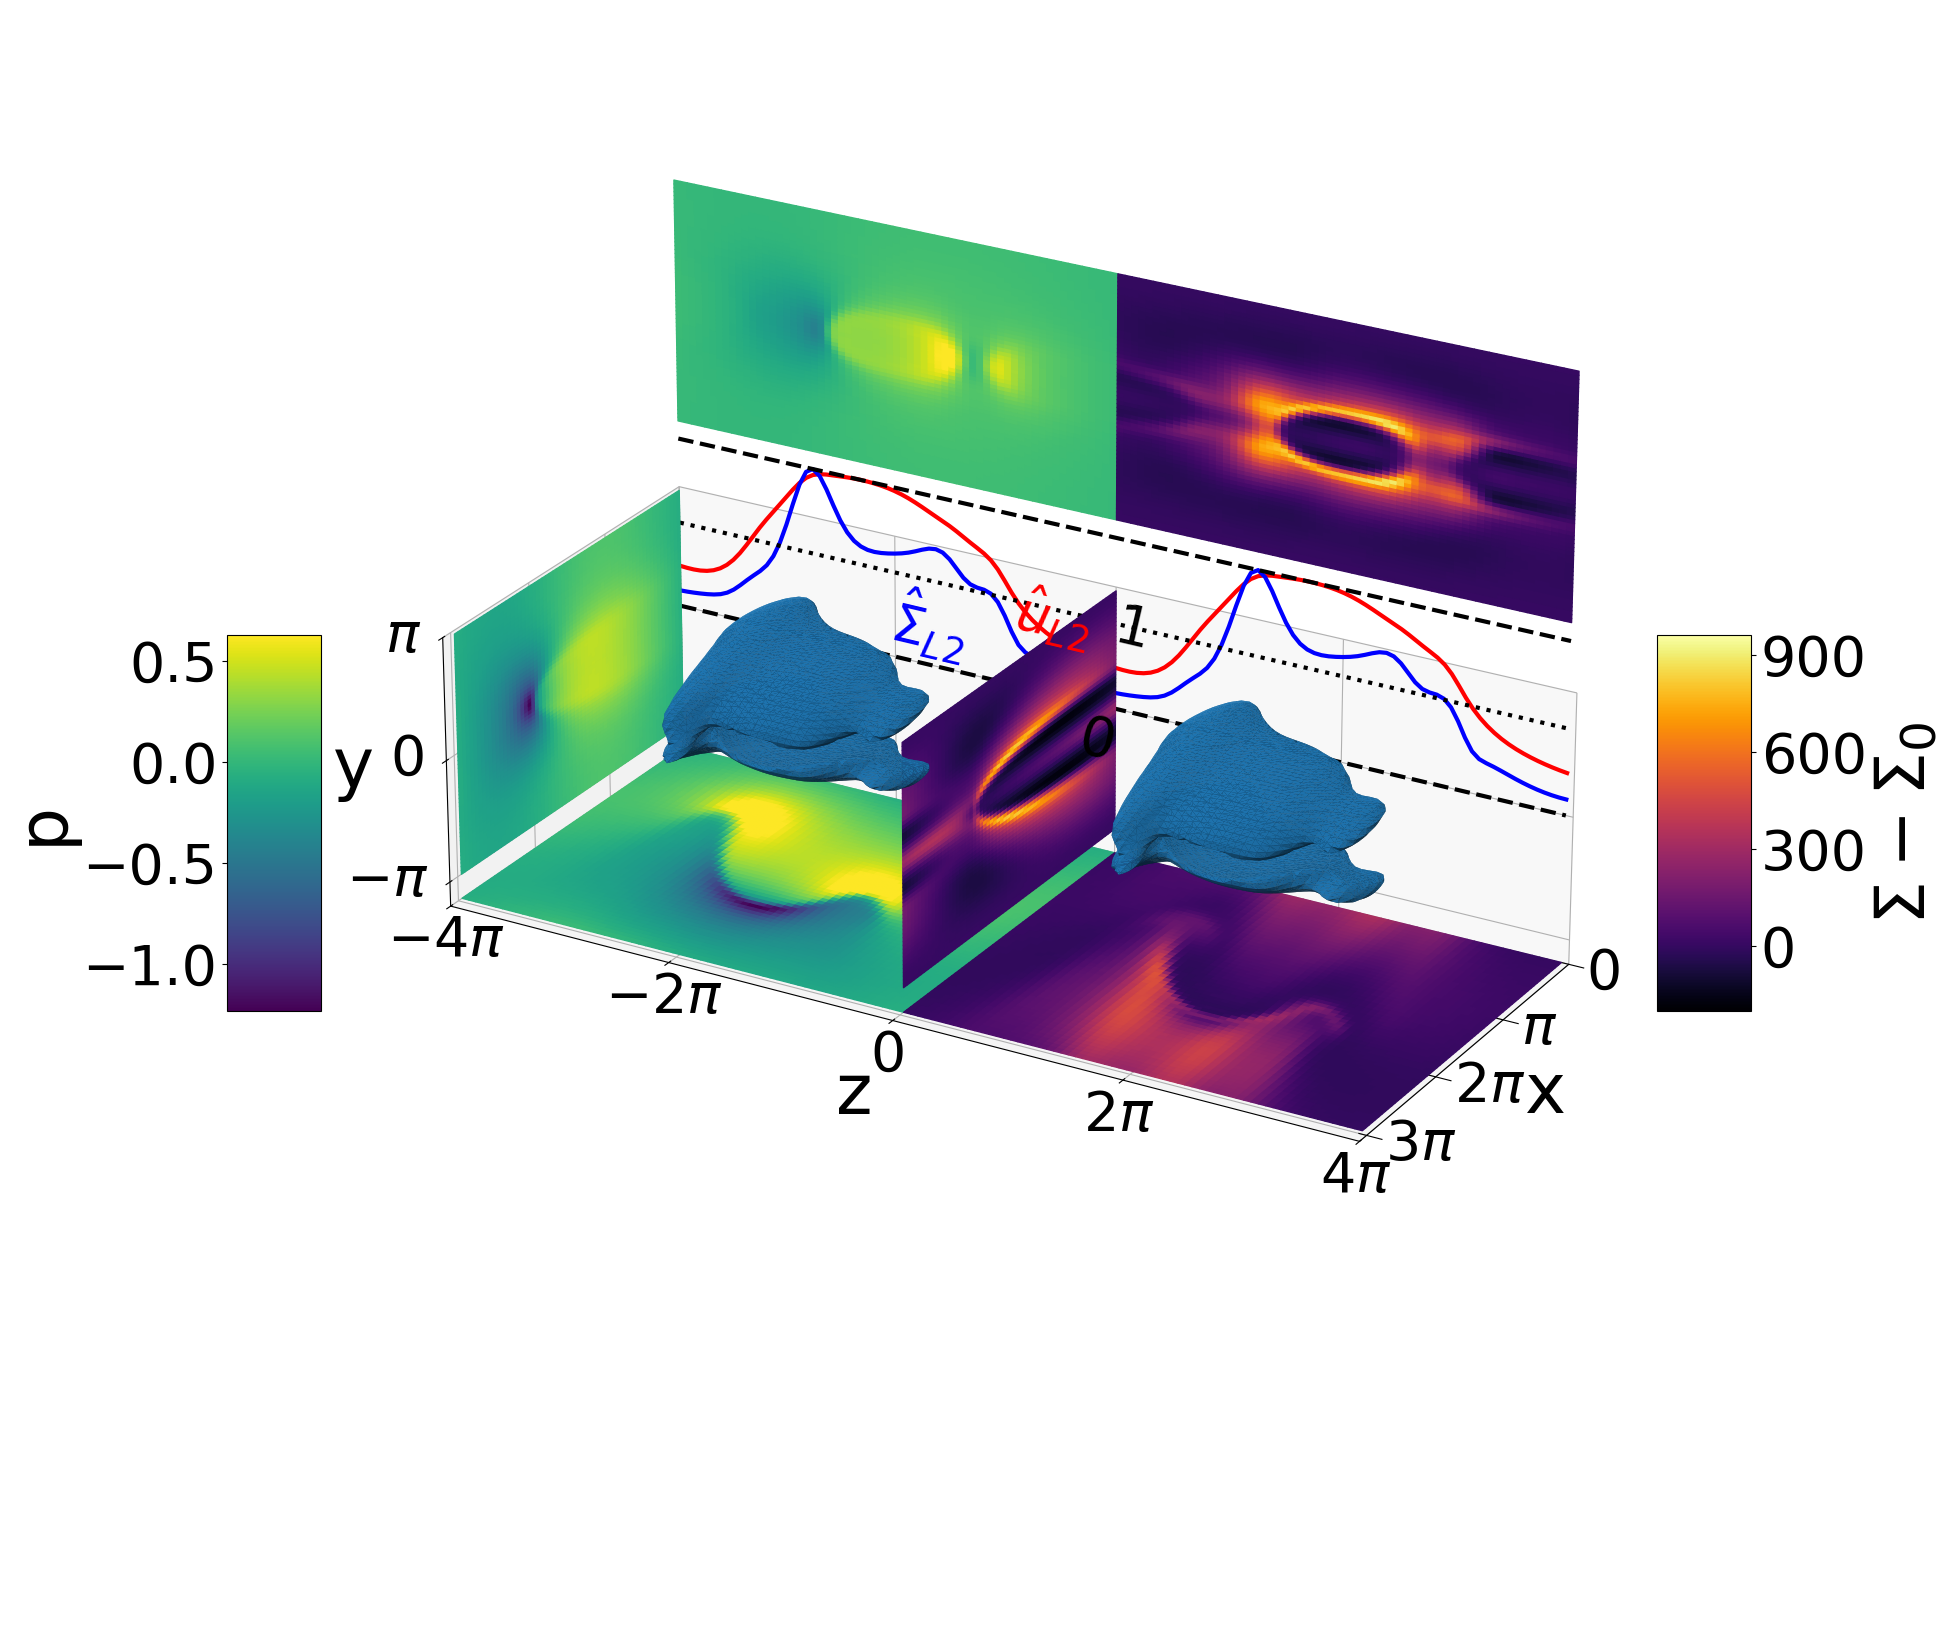

In [ ]:
# plt.rcParams['font.size'] = 40

# ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=450)
# # ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

# ax.view_init(elev=25, azim=30, roll=0)

# ax.computed_zorder = False

# ax.set_xlim(0, 3.1*np.pi)  
# ax.set_ylim(-4*np.pi, 4*np.pi)  

# ax.set_zlim((-1.2*np.pi, np.pi))


# ax.set_box_aspect((3*np.pi, 7*np.pi, 2*np.pi), zoom=0.7)

# ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40, va='center', ha='left')
# ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
# ax.set_yticks([0, 2*np.pi, 4*np.pi, -2*np.pi, -4*np.pi], ['0', r'$2\pi$', r'$4\pi$', r'$-2\pi$', r'$-4\pi$'], fontsize=40)
    
# # ax.tick_params(axis='x', pad=5)
# # ax.tick_params(axis='y', pad=5)
# # ax.tick_params(axis='z', pad=5)

# ### Get key p, trace terms
# min_p, max_p = np.min(p), np.max(p) * 0.6
# min_tr, max_tr = np.min(trace), np.max(trace)

# cmap_kind_p = 'viridis'
# cmap_p = plt.get_cmap(cmap_kind_p)
# cmap_kind_tr = 'inferno'
# cmap_tr = plt.get_cmap(cmap_kind_tr)

# norm_p = Normalize(vmin=min_p, vmax=max_p)
# sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
# norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
# sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

# ### Get x-z plane

# xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

# p_plane = p[:,:,Ny//2]
# tr_plane = trace[:,:,Ny//2]

# p_plane, xgrid_p, zgrid_p = p_plane[:,:Nz//2+1], xgrid[:, :Nz//2+1], zgrid[:,:Nz//2+1]
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, zgrid_tr = tr_plane[:,Nz//2:], xgrid[:, Nz//2:], zgrid[:, Nz//2:]
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)

# ### Get x-y plane

# xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

# p_plane = p[:,Nz//4,:]
# tr_plane = trace[:,Nz//4,:]

# p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, -4*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, 4*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)


# ### Get y-z plane

# zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

# p_plane = p[Nx//2,:,:]
# tr_plane = trace[Nx//2,:,:]

# p_plane, zgrid_p, ygrid_p = p_plane[:Nz//2+1,:], zgrid[:Nz//2+1,:], ygrid[:Nz//2+1,:]
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

# tr_plane, zgrid_tr, ygrid_tr = tr_plane[Nz//2:,:], zgrid[Nz//2:,:], ygrid[Nz//2:,:]
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.01)
# ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr + 8, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.01)


# sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
# cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
# cbar.set_label(label='p', size=50)
# cbar.ax.tick_params(labelsize=40)

# sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
# cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='right', pad=-0.08, ticks=[-300, 0, 300, 600, 900])
# cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
# cbar.ax.tick_params(labelsize=40)

# ### Showing max trace, u over z
# color = 'red'


# y_0 = 0
# y_1 = np.pi * 1.4
# u_metric = get_activity(u, x, y)
# u_metric = u_metric / np.max(u_metric)
# ax.plot(z, u_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
# trace_metric = get_activity(trace, x, y)
# trace_metric = trace_metric / np.max(trace_metric)
# ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
# ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
# ax.plot(z, (y_1+y_0)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
# ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

# ax.text(0,-0.95*np.pi, 1, r'$\hat u_{L2}$', 'y', color='red', fontsize=38)
# ax.text(0,-2.1*np.pi, -0.1, r'$\hat \Sigma_{L2}$', 'y', color='blue', fontsize=38)
# ax.text(0,-1.2, -0.5 *np.pi, r'$0$','y',  color='black', fontsize=40)
# ax.text(0,-0.2, 0.5*np.pi, r'$1$', 'y', color='black', fontsize=40)


In [ ]:
np.mean(w)

4.801490964805727e-16

In [22]:
x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
Nx, Ny, Nz = solver_params['Nx'], solver_params['Ny'], solver_params['Nz']
Lz = system_params['Lz']

p = data_fields['p'][-1,:,:,:]
c22 = data_fields['c22'][-1,:,:,:]
c11 = data_fields['c11'][-1,:,:,:]
u = data_fields['u'][-1,:,:,:]
w = data_fields['w'][-1,:,:,:]
c33 = data_fields['c33'][-1,:,:,:]
tr = c11 + c22 + c33

Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
U = base_flow['u']

mean_c22_y = np.mean(c22, axis=(0,1))

Ny = mean_c22_y.shape[0]
if mean_c22_y[0] > mean_c22_y[Ny//2]:
    u = shift_reflect(u, parity='odd')
    # v = shift_reflect(v, parity='even')
    w = shift_reflect(w, parity='even')
    p = shift_reflect(p, parity='even')
    c22 = shift_reflect(c22, parity='even')
    c33 = shift_reflect(c33, parity='even')
    c11 = shift_reflect(c11, parity='even')

roll_x = -20
u = np.roll(u, axis=0, shift=roll_x)
w = np.roll(w, axis=0, shift=roll_x)
p = np.roll(p, axis=0, shift=roll_x)
c22 = np.roll(c22, axis=0, shift=roll_x)
c33 = np.roll(c33, axis=0, shift=roll_x)
c11 = np.roll(c11, axis=0, shift=roll_x)


roll_z = 2
u = np.roll(u, axis=1, shift=roll_z)
w = np.roll(w, axis=1, shift=roll_z)
p = np.roll(p, axis=1, shift=roll_z)
c22 = np.roll(c22, axis=1, shift=roll_z)
c33 = np.roll(c33, axis=1, shift=roll_z)
c11 = np.roll(c11, axis=1, shift=roll_z)

p = p - base_flow['p'][:, None, :]
u = u - base_flow['u'][:, None, :]
w = w - base_flow['w'][:, None, :]
c22 = c22  - base_flow['c22'][:, None, :]
c11 = c11  - base_flow['c11'][:, None, :]
c33 = c33  - base_flow['c33'][:, None, :]
trace = c11 + c22 + c33

# trace = np.concatenate((trace,trace), axis=1)
# p = np.concatenate((p,p), axis=1)
# u = np.concatenate((u,u), axis=1)

# z = np.concatenate((z - Lz/2, z + Lz/2 ))
# Nz *= 2



Text(0, -8.79645943005142, '$0.5$')

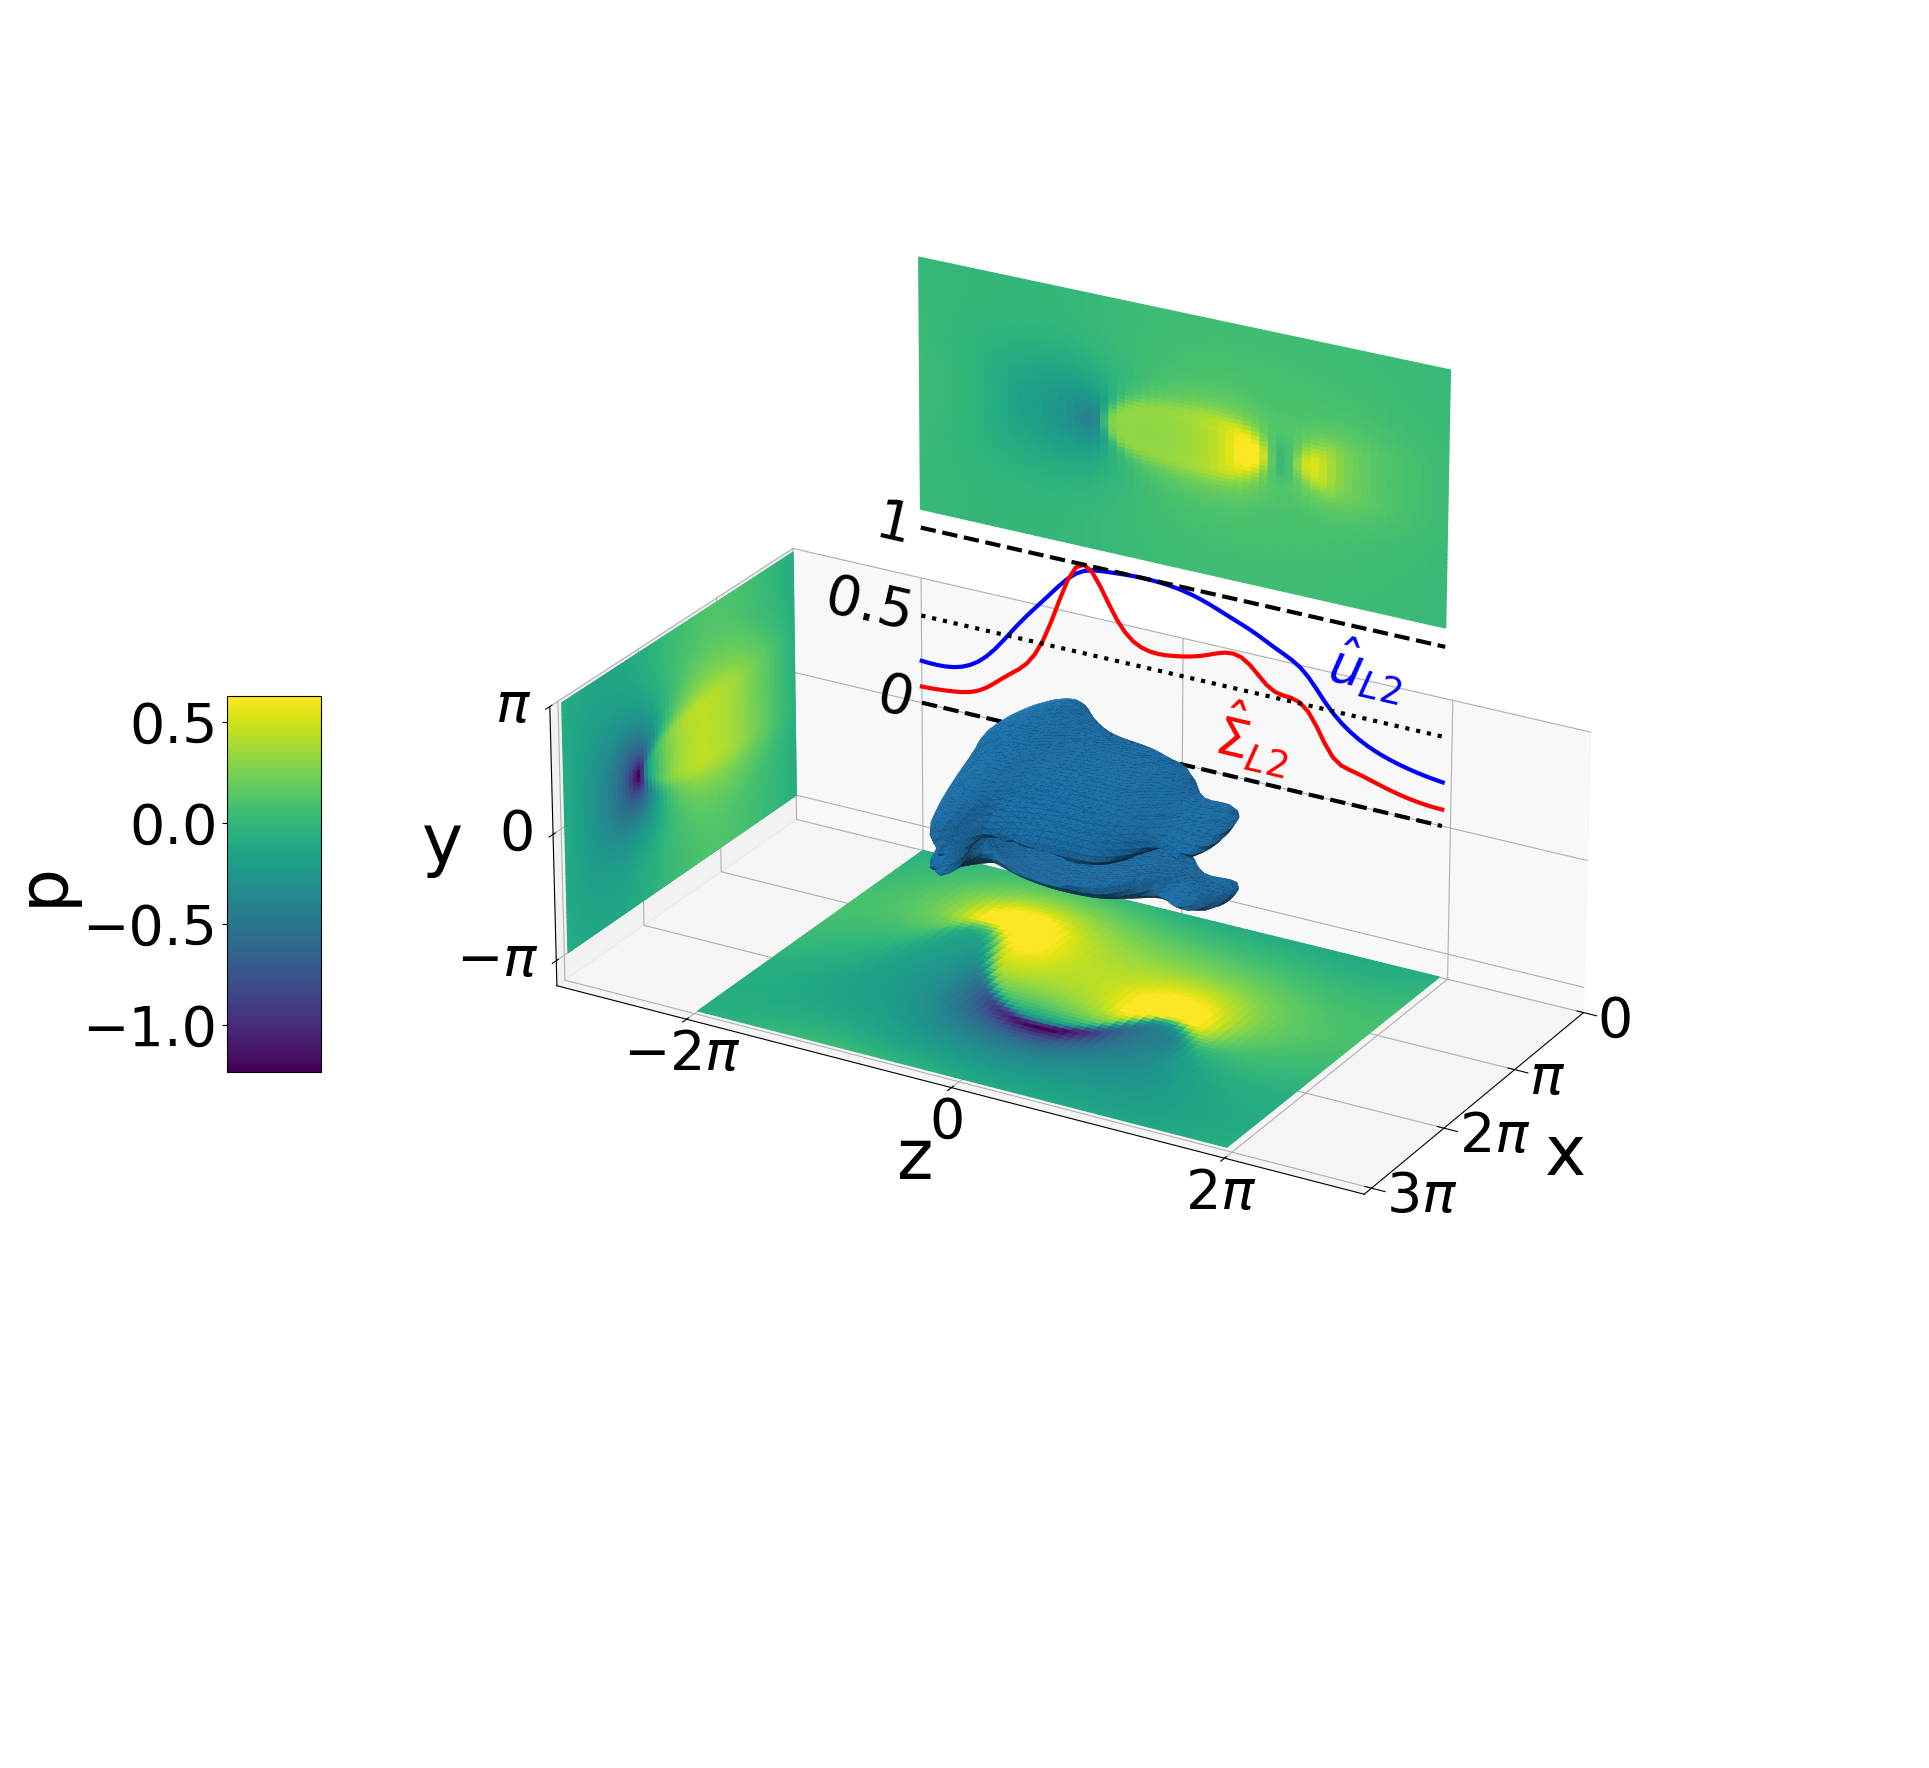

In [50]:
plt.rcParams['font.size'] = 40

ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=450)
# ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

ax.view_init(elev=25, azim=30, roll=0)

ax.computed_zorder = False

ax.set_xlim(0, 3.1*np.pi)  
ax.set_ylim(-3*np.pi, 3*np.pi)  

ax.set_zlim((-1.2*np.pi, np.pi))


ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40, va='center', ha='left')
ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
ax.set_yticks([0, 2*np.pi, -2*np.pi], ['0', r'$2\pi$',r'$-2\pi$'], fontsize=40)
    
# ax.tick_params(axis='x', pad=5)
# ax.tick_params(axis='y', pad=5)
# ax.tick_params(axis='z', pad=5)

### Get key p, trace terms
min_p, max_p = np.min(p), np.max(p) * 0.6
min_tr, max_tr = np.min(trace), np.max(trace)

cmap_kind_p = 'viridis'
cmap_p = plt.get_cmap(cmap_kind_p)
cmap_kind_tr = 'inferno'
cmap_tr = plt.get_cmap(cmap_kind_tr)

norm_p = Normalize(vmin=min_p, vmax=max_p)
sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

### Get x-z plane

xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

p_plane = p[:,:,Ny//2]
tr_plane = trace[:,:,Ny//2]

p_plane, xgrid_p, zgrid_p = p_plane, xgrid, zgrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, zgrid_tr = tr_plane, xgrid, zgrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)

### Get x-y plane

xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

p_plane = p[:,Nz//2,:]
tr_plane = trace[:,Nz//2,:]

p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, 4*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)


### Get y-z plane

zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

p_plane = p[Nx//2,:,:]
# tr_plane = trace[Nx//2,:,:]

p_plane, zgrid_p, ygrid_p = p_plane, zgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

# tr_plane, zgrid_tr, ygrid_tr = tr_plane, zgrid, ygrid
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.01)
# ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr + 8, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.01)


sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
cbar.set_label(label='p', size=50)
cbar.ax.tick_params(labelsize=40)

# sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
# cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='right', pad=-0.08, ticks=[-300, 0, 300, 600, 900])
# cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
# cbar.ax.tick_params(labelsize=40)

### Showing max trace, u over z
color = 'red'


y_0 = 0
y_1 = np.pi * 1.4
u_metric = get_activity(u, x, y)
u_metric = u_metric / np.max(u_metric)
ax.plot(z, u_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
trace_metric = get_activity(trace, x, y)
trace_metric = trace_metric / np.max(trace_metric)
ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z, (y_1+y_0)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

ax.text(0,1.05*np.pi, 2.5, r'$\hat u_{L2}$', 'y', color='blue', fontsize=38)
ax.text(0, 0.2*np.pi, 0, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=38)
ax.text(0,-2.4*np.pi, -0.2 *np.pi, r'$0$','y',  color='black', fontsize=40)
ax.text(0,-2.4*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)
ax.text(0,-2.8*np.pi, 0.4*np.pi, r'$0.5$', 'y', color='black', fontsize=40)


Text(0, -8.79645943005142, '$0.5$')

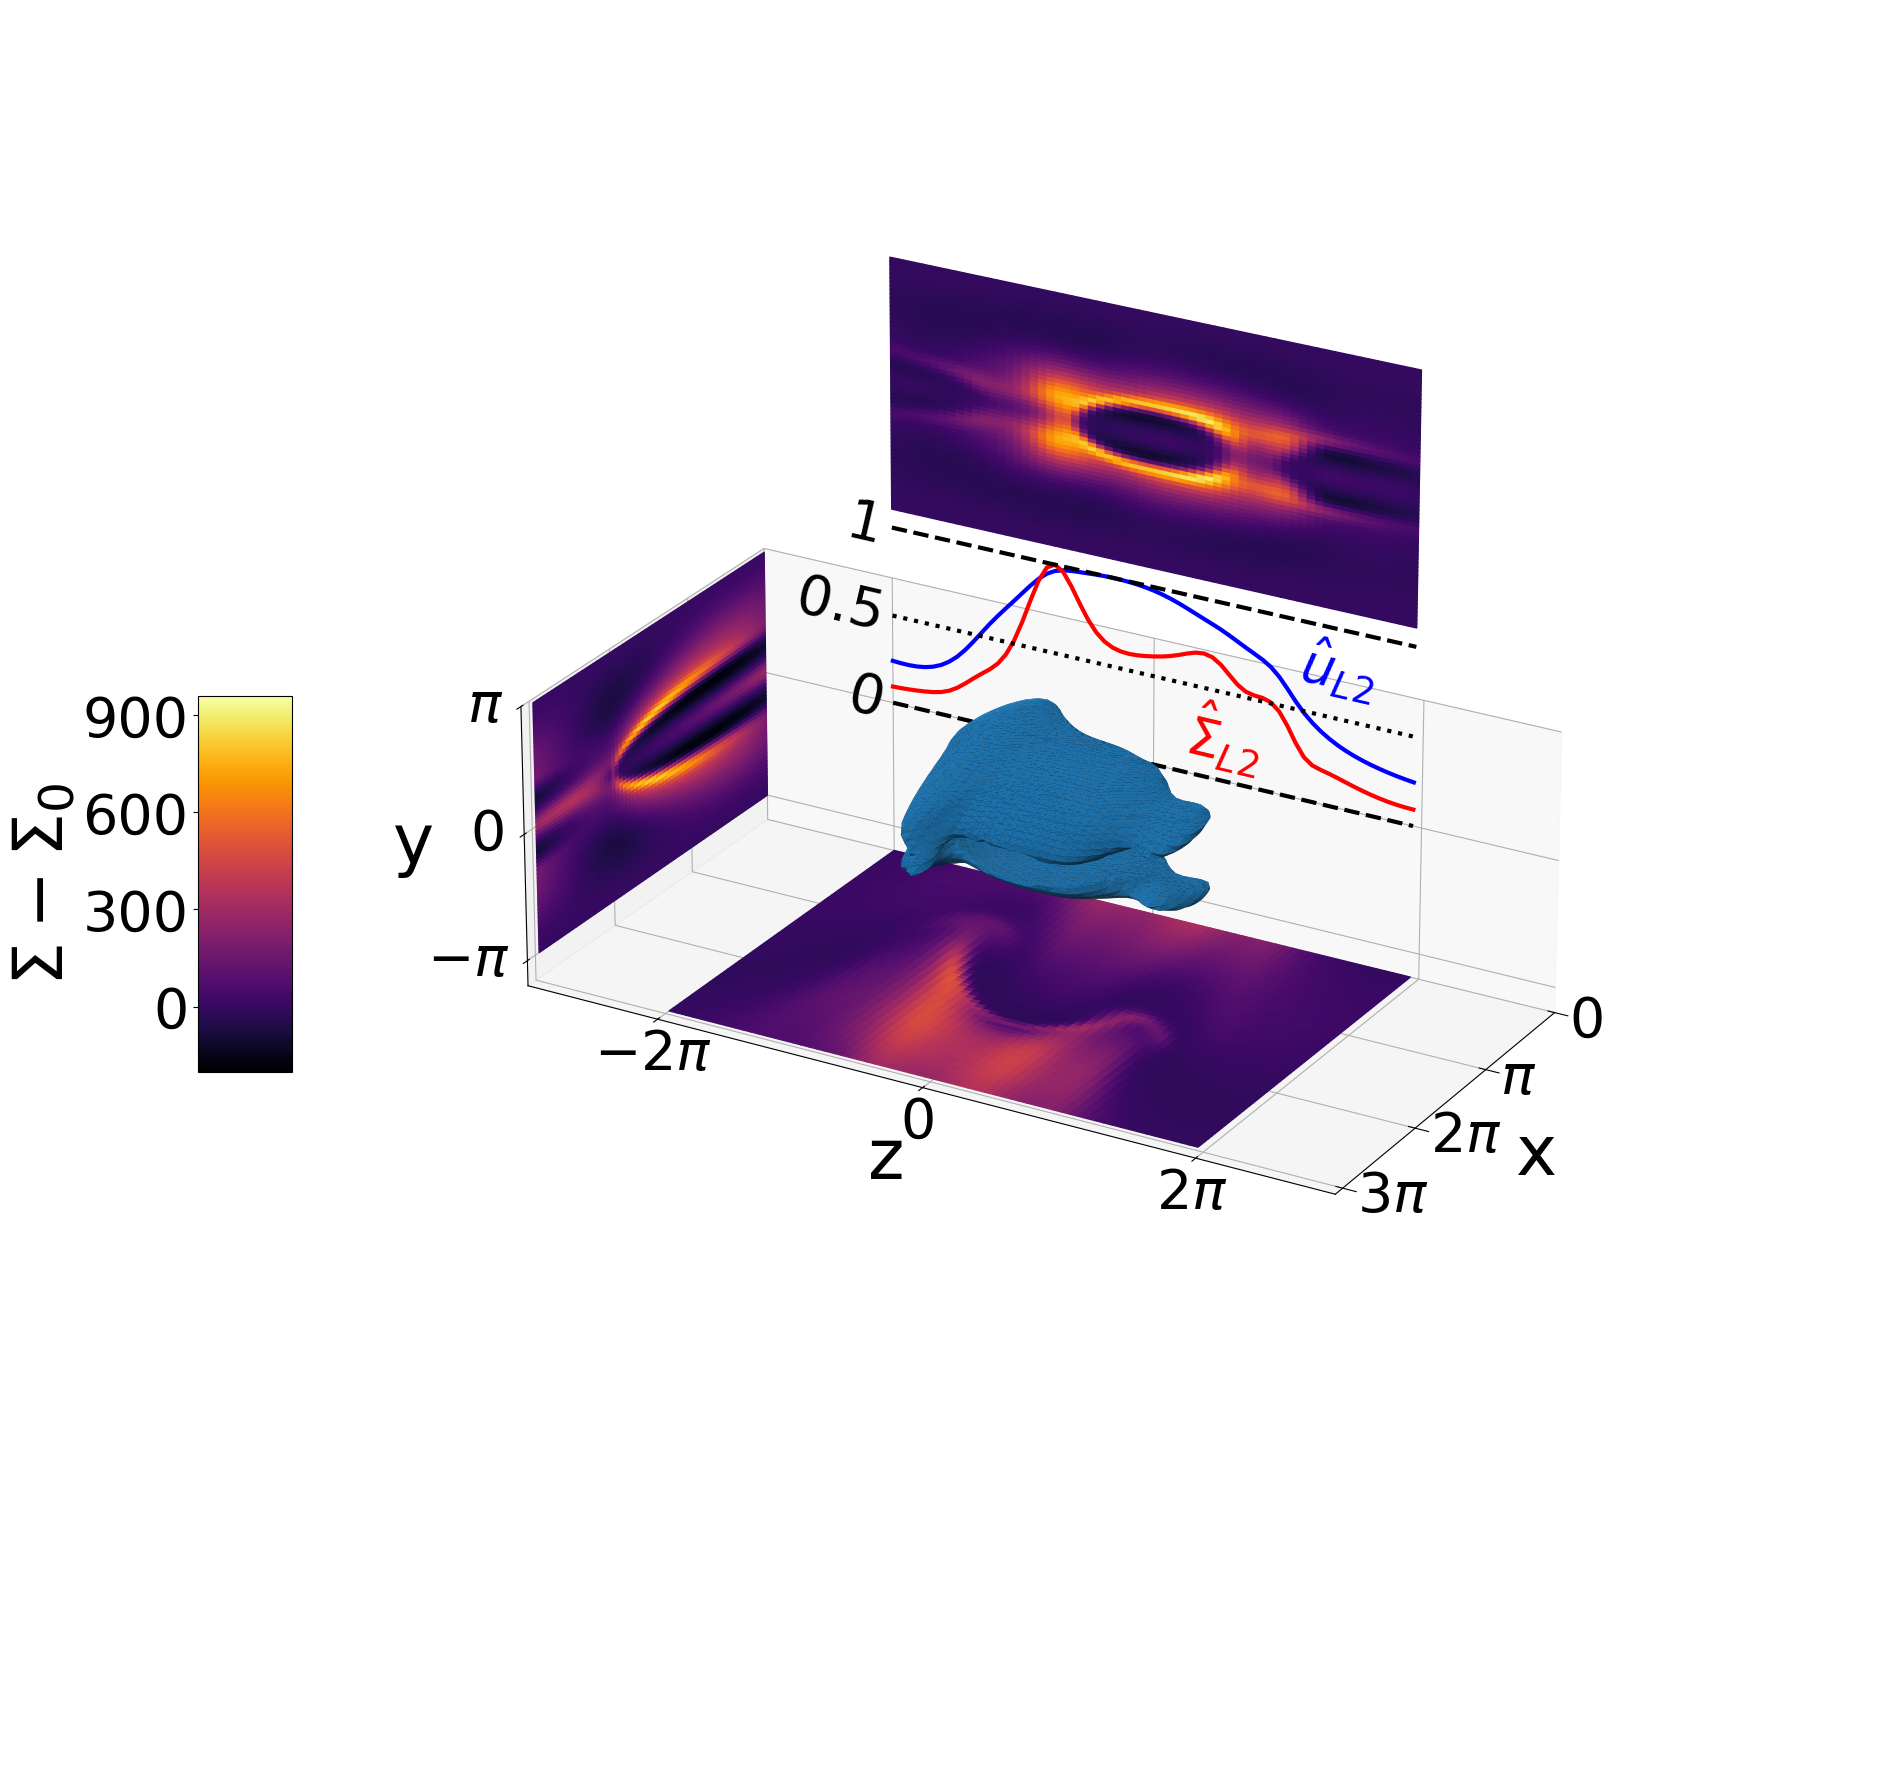

In [52]:
plt.rcParams['font.size'] = 40

ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=450)
# ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

ax.view_init(elev=25, azim=30, roll=0)

ax.computed_zorder = False

ax.set_xlim(0, 3.1*np.pi)  
ax.set_ylim(-3*np.pi, 3*np.pi)  

ax.set_zlim((-1.2*np.pi, np.pi))


ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40, va='center', ha='left')
ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
ax.set_yticks([0, 2*np.pi, -2*np.pi], ['0', r'$2\pi$',r'$-2\pi$'], fontsize=40)
    
# ax.tick_params(axis='x', pad=5)
# ax.tick_params(axis='y', pad=5)
# ax.tick_params(axis='z', pad=5)

### Get key p, trace terms
min_p, max_p = np.min(p), np.max(p) * 0.6
min_tr, max_tr = np.min(trace), np.max(trace)

cmap_kind_p = 'viridis'
cmap_p = plt.get_cmap(cmap_kind_p)
cmap_kind_tr = 'inferno'
cmap_tr = plt.get_cmap(cmap_kind_tr)

norm_p = Normalize(vmin=min_p, vmax=max_p)
sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

### Get x-z plane

xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

p_plane = p[:,:,Ny//2]
tr_plane = trace[:,:,Ny//2]

p_plane, xgrid_p, zgrid_p = p_plane, xgrid, zgrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, zgrid_tr = tr_plane, xgrid, zgrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
                            # facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.1)

### Get x-y plane

xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

p_plane = p[:,Nz//2,:]
tr_plane = trace[:,Nz//2,:]

p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
                            # facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, -3*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.1)


### Get y-z plane

zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

# p_plane = p[Nx//2,:,:]
tr_plane = trace[Nx//2,:,:]

# p_plane, zgrid_p, ygrid_p = p_plane, zgrid, ygrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

tr_plane, zgrid_tr, ygrid_tr = tr_plane, zgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
                            # facecolors=facecolors_p, shade=False, zorder=0.01)
ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr + 8, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.01)


# sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
# cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
# cbar.set_label(label='p', size=50)
# cbar.ax.tick_params(labelsize=40)

sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-300, 0, 300, 600, 900])
cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
cbar.ax.tick_params(labelsize=40)

### Showing max trace, u over z
color = 'red'


y_0 = 0
y_1 = np.pi * 1.4
u_metric = get_activity(u, x, y)
u_metric = u_metric / np.max(u_metric)
ax.plot(z, u_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
trace_metric = get_activity(trace, x, y)
trace_metric = trace_metric / np.max(trace_metric)
ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z, (y_1+y_0)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

ax.text(0,1.05*np.pi, 2.5, r'$\hat u_{L2}$', 'y', color='blue', fontsize=38)
ax.text(0, 0.2*np.pi, 0, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=38)
ax.text(0,-2.4*np.pi, -0.2 *np.pi, r'$0$','y',  color='black', fontsize=40)
ax.text(0,-2.4*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)
ax.text(0,-2.8*np.pi, 0.4*np.pi, r'$0.5$', 'y', color='black', fontsize=40)
